In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# MCMC Renewal Methods and Convergence Assessment

## Table 12.1 - Asymptotic Variance Estimation

The table below shows the estimation of the asymptotic variance $\tau_0^2$ for $h(\theta) = \theta$ and renewal with sets $C = \{x_0 - r, x_0 + r\}$ with $x_0 = 0$, various values of $r$, and $\pi' = 50$ (1 million simulations).

| $r$ | 0.1 | 0.21 | 0.32 | 0.43 | 0.54 | 0.65 | 0.76 | 0.87 | 0.98 | 1.09 |
|-----|-----|------|------|------|------|------|------|------|------|------|
| $\hat{\tau}$ | 0.92 | 0.83 | 0.73 | 0.63 | 0.53 | 0.45 | 0.38 | 0.31 | 0.26 | 0.22 |
| $\mu_C$ | 25.3 | 13.9 | 10.5 | 9.6 | 8.8 | 9.6 | 9.8 | 10.4 | 11.4 | 12.7 |
| $\hat{\tau}_0^2$ | 1135 | 1138 | 1162 | 1150 | 1162 | 1195 | 1160 | 1149 | 1109 | 1100 |

from $R(\theta^{(t)})$, if $k_i = 0$), one first simulates $\theta^{(t+1)}$ conditional on $\theta^{(t)}$ (in the usual way) and then simulates $k_i$ conditional on $(\theta^{(t)}, \theta^{(t+1)})$. Calculation of $\text{Pr}(k_i = 1|\theta^{(t)}, \theta^{(t+1)})$ is straightforward if the densities $K$ and $\nu$ are known (Problem 12.11).

The previous example shows how *conservative* this method can be and thus how many iterations it requires. In addition, the method does not guarantee convergence since the small sets can always omit important parts of the support of $P$.

A particular setup where the renewal method behaves quite satisfactorily is the case of Markov chains with *finite* state-space. In fact, the choice of a small set is then immediate: If $E$ can be written as $\{i : i \in I\}$, $C = \{i_0\}$ is a small set, with $i_0$ the state with the highest probability under the stationary distribution $\pi = (\pi_i)_{i\in I}$. If $\mathbb{P} = (p_{ij})$ denotes the transition matrix of the chain,

$$\nu = \delta_{i_0}, \quad \varepsilon = 1, \quad K(i,j) = p_{i_0 j}$$

and renewal occurs at step $t$ if $\theta^{(t)} = i_0$. Considering a parallel other likely states under $\pi$, we then immediately derive a convergence indicator.

## Example 12.17. A finite Markov chain.

Consider $E = \{0, 1, 2, 3\}$ and

$$\mathbb{P} = \begin{pmatrix}
0.05 & 0.03 & 0.82 & 0.10 \\
0.05 & 0.24 & 0.03 & 0.68 \\
0.11 & 0.19 & 0.67 & 0.03 \\
0.08 & 0.04 & 0.09 & 0.79
\end{pmatrix}$$

The stationary distribution is then $\pi = (0.097, 0.056, 0.085, 0.762)$, with mean $E^\pi[\theta] = 2.2$ compares estimators of $\tau_0^2$, with $h(\theta) = \theta$ for the four small sets $C = \{i_0\}$ and shows that stabilizing is achieved for $T = 500,000$.

This academic example illustrates how easily the criterion can be used in finite environments. Finite state-space models are, of course, far from trivial since, as shown by the *Duality Principle* (Section 9.2.3), one can use the simplicity of some subchains to verify convergence for the Gibbs sampler. Therefore, renewal can be created for a (possibly artificial) subchain $(z^{(t)})$ and later

## Table 12.2 - Estimators of $\tau_0^2$ for $h(x) = x$, obtained by renewal in $i_0$.

| $T/i_0$ | 0 | 1 | 2 | 3 |
|---------|---|---|---|---|
| 5000 | 1.19 | 1.20 | 1.26 | 1.21 |
| 500,000 | 1.344 | 1.335 | 1.340 | 1.343 |

applied to the parameter of interest if the Duality Principle applies. (See also Chauveau et al. 1998 for a related use of the Central Limit Theorem for convergence assessment.)

## Example 12.18. Grouped multinomial model.

The Gibbs sampler corresponding to the grouped multinomial model of Example 9.8,

$$X \sim \mathcal{M}_n(n; \mu_1 + b_1, a_2\mu + b_2, a_3\mu + b_3, a_4\mu + b_4, c(1 - \mu - \eta))$$

actually enjoys a data augmentation structure and satisfies the conditions leading to the Duality Principle. Moreover, the latent space $(z_1, \ldots, z_4)$ has finite-support since:

$$Z_i \sim \mathcal{B}\left(x_i, \frac{a_i\mu}{a_i\mu + b_i}\right) \quad (i = 1, 2), \quad Z_i \sim \mathcal{B}\left(x_i, \frac{a_i\eta}{a_i\eta + b_i}\right) \quad (i = 3, 4)$$

Therefore, the support of $(Z^{(t)})$ is of size $(x_1+1)×\cdots×(x_4+1)$. A preliminary examination indicates that $(0, 0, 0, 0)$ is the modal state of $(Z^{(t)})$, with an average excursion time of 27.1. The second most frequent state is $(0, 2, 0, 0)$, with an average excursion time of 28.1. In order to evaluate the performance of renewal control, we also used the state $(1, 1, 0, 0)$, which has, on average, every 49.1 iterations. Table 12.3 describes the asymptotic variances obtained for the functions

$$h_1(\mu, \eta) = \mu - \eta, \quad h_2(\mu, \eta) = \frac{\mu}{1-\eta}, \quad h_3(\mu, \eta) = \frac{\mu}{1-\mu-\eta}$$

The estimator of $h_3$ is obtained by Rao-Blackwellization,

$$\frac{1}{T} \sum_{t=1}^T \frac{0.5 + z_1^{(t)} + z_2^{(t)}}{z_5 - 0.5}$$

which increases the stability of the estimator and reduces its variance. 

The results obtained are in agreement for the three states under study, even though they cannot rigorously establish convergence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Example 12.17 - Finite Markov Chain Implementation
class FiniteMarkovChain:
    def __init__(self, transition_matrix):
        """
        Initialize a finite Markov chain with the given transition matrix.
        
        Parameters:
        -----------
        transition_matrix : numpy.ndarray
            Square matrix with transition probabilities
        """
        self.P = np.array(transition_matrix)
        self.n_states = self.P.shape[0]
        self.compute_stationary_distribution()
    
    def compute_stationary_distribution(self):
        """Compute the stationary distribution of the Markov chain."""
        # Find eigenvalues and eigenvectors of the transposed transition matrix
        eigenvalues, eigenvectors = np.linalg.eig(self.P.T)
        
        # Find the eigenvector corresponding to eigenvalue 1
        idx = np.isclose(eigenvalues, 1.0)
        eigenvector = eigenvectors[:, idx].real
        
        # Normalize the eigenvector
        self.pi = eigenvector.flatten() / np.sum(eigenvector)
        return self.pi
    
    def simulate(self, n_steps, initial_state=None):
        """
        Simulate a Markov chain for n_steps.
        
        Parameters:
        -----------
        n_steps : int
            Number of steps to simulate
        initial_state : int, optional
            Initial state (if None, sample from the stationary distribution)
            
        Returns:
        --------
        chain : numpy.ndarray
            Simulated Markov chain
        """
        if initial_state is None:
            initial_state = np.random.choice(self.n_states, p=self.pi)
        
        chain = np.zeros(n_steps + 1, dtype=int)
        chain[0] = initial_state
        
        for i in range(n_steps):
            chain[i + 1] = np.random.choice(self.n_states, p=self.P[chain[i]])
        
        return chain
    
    def renewal_estimator(self, chain, small_set, h_func=None):
        """
        Compute the renewal estimator of the asymptotic variance.
        
        Parameters:
        -----------
        chain : numpy.ndarray
            Simulated Markov chain
        small_set : int or list
            State(s) where renewal occurs
        h_func : function, optional
            Function to compute on the chain (default: identity function)
            
        Returns:
        --------
        tau2 : float
            Estimated asymptotic variance
        mu_C : float
            Average excursion time
        """
        if h_func is None:
            h_func = lambda x: x
        
        if isinstance(small_set, int):
            small_set = [small_set]
        
        # Identify renewal times
        is_renewal = np.zeros_like(chain, dtype=bool)
        for state in small_set:
            is_renewal = np.logical_or(is_renewal, chain == state)
        
        renewal_times = np.where(is_renewal)[0]
        
        # Calculate excursion times
        excursion_times = np.diff(renewal_times)
        mu_C = np.mean(excursion_times)
        
        # Calculate h values
        h_values = np.array([h_func(state) for state in chain])
        
        # Calculate partial sums between renewals
        partial_sums = []
        for i in range(len(renewal_times) - 1):
            start = renewal_times[i]
            end = renewal_times[i + 1]
            partial_sum = np.sum(h_values[start:end]) - excursion_times[i] * np.mean(h_values)
            partial_sums.append(partial_sum)
        
        # Compute asymptotic variance
        tau2 = np.var(partial_sums) / np.mean(excursion_times)
        
        return tau2, mu_C


# Example 12.18 - Grouped Multinomial Model
class GroupedMultinomialModel:
    def __init__(self, n, x, a, b, c):
        """
        Initialize the grouped multinomial model.
        
        Parameters:
        -----------
        n : int
            Total sample size
        x : list or numpy.ndarray
            Observed counts [x1, x2, x3, x4]
        a : list or numpy.ndarray
            Coefficients [a1, a2, a3, a4]
        b : list or numpy.ndarray
            Coefficients [b1, b2, b3, b4]
        c : float
            Coefficient for the final category
        """
        self.n = n
        self.x = np.array(x)
        self.a = np.array(a)
        self.b = np.array(b)
        self.c = c
        self.z_shape = tuple(x_i + 1 for x_i in self.x)
    
    def gibbs_sampler(self, n_iterations, initial_mu=0.2, initial_eta=0.2, burnin=1000):
        """
        Run Gibbs sampler for the grouped multinomial model.
        
        Parameters:
        -----------
        n_iterations : int
            Number of iterations
        initial_mu, initial_eta : float
            Initial values for mu and eta
        burnin : int
            Number of iterations to discard as burn-in
            
        Returns:
        --------
        mu_samples, eta_samples : numpy.ndarray
            Samples from the posterior
        z_samples : numpy.ndarray
            Samples of the latent variables
        """
        # Initialize
        mu = initial_mu
        eta = initial_eta
        z = np.zeros(4, dtype=int)
        
        # Storage
        mu_samples = np.zeros(n_iterations)
        eta_samples = np.zeros(n_iterations)
        z_samples = np.zeros((n_iterations, 4), dtype=int)
        
        # Run Gibbs sampler
        for i in range(-burnin, n_iterations):
            # Update Z1, Z2 based on current mu
            for j in range(2):
                p = self.a[j] * mu / (self.a[j] * mu + self.b[j])
                z[j] = np.random.binomial(self.x[j], p)
            
            # Update Z3, Z4 based on current eta
            for j in range(2, 4):
                p = self.a[j] * eta / (self.a[j] * eta + self.b[j])
                z[j] = np.random.binomial(self.x[j], p)
            
            # Update mu and eta from full conditionals
            alpha_mu = 0.5 + z[0] + z[1]
            beta_mu = 0.5 + self.x[0] - z[0] + self.x[1] - z[1]
            
            alpha_eta = 0.5 + z[2] + z[3]
            beta_eta = 0.5 + self.x[2] - z[2] + self.x[3] - z[3]
            
            # Constrain to mu + eta < 1
            while True:
                mu_prop = np.random.beta(alpha_mu, beta_mu)
                eta_prop = np.random.beta(alpha_eta, beta_eta)
                if mu_prop + eta_prop < 1:
                    mu = mu_prop
                    eta = eta_prop
                    break
            
            # Store samples after burn-in
            if i >= 0:
                mu_samples[i] = mu
                eta_samples[i] = eta
                z_samples[i] = z.copy()
        
        return mu_samples, eta_samples, z_samples
    
    def compute_renewal_estimates(self, mu_samples, eta_samples, z_samples, small_set_states):
        """
        Compute renewal estimates for the asymptotic variances.
        
        Parameters:
        -----------
        mu_samples, eta_samples : numpy.ndarray
            MCMC samples
        z_samples : numpy.ndarray
            Latent variable samples
        small_set_states : list of tuples
            List of states (z values) to use as small sets
            
        Returns:
        --------
        results : dict
            Dictionary with results for each small set and function
        """
        results = {}
        
        # Define the functions h1, h2, h3
        h1 = lambda mu, eta: mu - eta
        h2 = lambda mu, eta: mu / (1 - eta)
        h3 = lambda mu, eta: mu / (1 - mu - eta)
        
        functions = {
            'h1': h1,
            'h2': h2,
            'h3': h3
        }
        
        # Calculate function values
        h_values = {
            'h1': h1(mu_samples, eta_samples),
            'h2': h2(mu_samples, eta_samples),
            'h3': h3(mu_samples, eta_samples)
        }
        
        for state in small_set_states:
            state_tuple = tuple(state)
            
            # Find renewal times
            is_renewal = np.all(z_samples == state, axis=1)
            renewal_times = np.where(is_renewal)[0]
            
            if len(renewal_times) < 2:
                results[state_tuple] = {
                    'excursion_time': np.nan,
                    'tau2_h1': np.nan,
                    'tau2_h2': np.nan,
                    'tau2_h3': np.nan
                }
                continue
            
            # Calculate excursion times
            excursion_times = np.diff(renewal_times)
            mean_excursion = np.mean(excursion_times)
            
            results[state_tuple] = {'excursion_time': mean_excursion}
            
            # Calculate asymptotic variances for each function
            for func_name, h_vals in h_values.items():
                # Calculate partial sums between renewals
                partial_sums = []
                for i in range(len(renewal_times) - 1):
                    start = renewal_times[i]
                    end = renewal_times[i + 1]
                    partial_sum = np.sum(h_vals[start:end]) - excursion_times[i] * np.mean(h_vals)
                    partial_sums.append(partial_sum)
                
                # Compute asymptotic variance
                tau2 = np.var(partial_sums) / mean_excursion
                results[state_tuple][f'tau2_{func_name}'] = tau2
        
        return results


# Demonstration of Example 12.17
def example_12_17():
    # Transition matrix from the paper
    P = np.array([
        [0.05, 0.03, 0.82, 0.10],
        [0.05, 0.24, 0.03, 0.68],
        [0.11, 0.19, 0.67, 0.03],
        [0.08, 0.04, 0.09, 0.79]
    ])
    
    mc = FiniteMarkovChain(P)
    
    # Print stationary distribution
    print("Stationary distribution:", mc.pi)
    
    # Run simulations for different small sets and sample sizes
    sample_sizes = [5000, 500000]
    results = np.zeros((len(sample_sizes), 4))
    
    for i, n in enumerate(sample_sizes):
        print(f"\nRunning simulation with {n} samples...")
        chain = mc.simulate(n)
        
        for j in range(4):
            tau2, mu_C = mc.renewal_estimator(chain, j)
            results[i, j] = tau2
            if i == 0:  # Only print excursion times for the first sample size
                print(f"Small set C = {{{j}}}, Average excursion time: {mu_C:.1f}")
    
    # Print the results
    df = pd.DataFrame(results, index=[f"{n}" for n in sample_sizes], columns=[f"{j}" for j in range(4)])
    print("\nEstimators of τ²₀ for h(x) = x, obtained by renewal in i₀:")
    print(df)
    
    return mc, results


# Demonstration of Example 12.18
def example_12_18():
    # Example data (not provided in the images, using placeholder values)
    n = 100  # Total sample size
    x = [20, 25, 15, 10]  # Observed counts
    a = [1.0, 1.5, 2.0, 1.2]  # Coefficients
    b = [0.5, 0.8, 0.3, 0.9]  # Coefficients
    c = 1.0  # Coefficient for the final category
    
    model = GroupedMultinomialModel(n, x, a, b, c)
    
    # Run Gibbs sampler
    print("Running Gibbs sampler for the grouped multinomial model...")
    n_iter = 50000
    mu_samples, eta_samples, z_samples = model.gibbs_sampler(n_iter)
    
    # Find most frequent Z states
    z_tuples = [tuple(z) for z in z_samples]
    unique_states, counts = np.unique(z_samples, axis=0, return_counts=True)
    top_states = unique_states[np.argsort(-counts)][:3]
    
    # Print most frequent states
    for i, state in enumerate(top_states):
        state_count = np.sum(np.all(z_samples == state, axis=1))
        frequency = state_count / n_iter
        print(f"State {tuple(state)}: frequency = {frequency:.4f}")
    
    # Compute renewal estimates
    results = model.compute_renewal_estimates(mu_samples, eta_samples, z_samples, top_states)
    
    # Print results
    print("\nRenewal estimation results:")
    for state, res in results.items():
        print(f"\nSmall set C = {{{state}}}")
        print(f"Average excursion time: {res['excursion_time']:.1f}")
        print(f"τ²₀ for h₁(μ,η) = μ-η: {res['tau2_h1']:.4f}")
        print(f"τ²₀ for h₂(μ,η) = μ/(1-η): {res['tau2_h2']:.4f}")
        print(f"τ²₀ for h₃(μ,η) = μ/(1-μ-η): {res['tau2_h3']:.4f}")
    
    return model, results


# Run examples
if __name__ == "__main__":
    print("Example 12.17 - Finite Markov Chain")
    print("=" * 40)
    mc, results_12_17 = example_12_17()
    
    print("\n\nExample 12.18 - Grouped Multinomial Model")
    print("=" * 40)
    model, results_12_18 = example_12_18()

Example 12.17 - Finite Markov Chain
Stationary distribution: [0.08440307 0.11358737 0.34475953 0.45725003]

Running simulation with 5000 samples...
Small set C = {0}, Average excursion time: 12.3
Small set C = {1}, Average excursion time: 9.0
Small set C = {2}, Average excursion time: 2.9
Small set C = {3}, Average excursion time: 2.1

Running simulation with 500000 samples...

Estimators of τ²₀ for h(x) = x, obtained by renewal in i₀:
               0         1         2         3
5000    1.998922  2.211850  2.140856  2.167827
500000  2.050205  2.059898  2.054414  2.050911


Example 12.18 - Grouped Multinomial Model
Running Gibbs sampler for the grouped multinomial model...
State (8, 10, 12, 4): frequency = 0.0013
State (8, 11, 12, 4): frequency = 0.0012
State (7, 9, 12, 4): frequency = 0.0012

Renewal estimation results:

Small set C = {(8, 10, 12, 4)}
Average excursion time: 733.5
τ²₀ for h₁(μ,η) = μ-η: 0.0906
τ²₀ for h₂(μ,η) = μ/(1-η): 0.0684
τ²₀ for h₃(μ,η) = μ/(1-μ-η): 52184058.8

In [2]:
import random
import math

# Example 12.17 - Finite Markov Chain Implementation
class FiniteMarkovChain:
    def __init__(self, transition_matrix):
        """
        Initialize a finite Markov chain with the given transition matrix.
        
        Parameters:
        -----------
        transition_matrix : list of lists
            Square matrix with transition probabilities
        """
        self.P = transition_matrix
        self.n_states = len(self.P)
        self.pi = self.compute_stationary_distribution()
    
    def compute_stationary_distribution(self):
        """
        Compute the stationary distribution using power iteration method.
        This is a simpler approach than eigenvalue decomposition.
        """
        # Start with a uniform distribution
        pi = [1.0 / self.n_states] * self.n_states
        
        # Power iteration method
        for _ in range(1000):  # Usually converges quickly
            new_pi = [0.0] * self.n_states
            for i in range(self.n_states):
                for j in range(self.n_states):
                    new_pi[i] += pi[j] * self.P[j][i]
            
            # Normalize
            total = sum(new_pi)
            pi = [p / total for p in new_pi]
            
        return pi
    
    def simulate(self, n_steps, initial_state=None):
        """
        Simulate a Markov chain for n_steps.
        
        Parameters:
        -----------
        n_steps : int
            Number of steps to simulate
        initial_state : int, optional
            Initial state (if None, sample from the stationary distribution)
            
        Returns:
        --------
        chain : list
            Simulated Markov chain
        """
        if initial_state is None:
            # Sample from stationary distribution
            r = random.random()
            cumsum = 0.0
            for i, p in enumerate(self.pi):
                cumsum += p
                if r < cumsum:
                    initial_state = i
                    break
        
        chain = [initial_state]
        
        for _ in range(n_steps):
            current_state = chain[-1]
            # Sample next state from transition probabilities
            r = random.random()
            cumsum = 0.0
            for i, p in enumerate(self.P[current_state]):
                cumsum += p
                if r < cumsum:
                    chain.append(i)
                    break
        
        return chain
    
    def renewal_estimator(self, chain, small_set, h_func=None):
        """
        Compute the renewal estimator of the asymptotic variance.
        
        Parameters:
        -----------
        chain : list
            Simulated Markov chain
        small_set : int or list
            State(s) where renewal occurs
        h_func : function, optional
            Function to compute on the chain (default: identity function)
            
        Returns:
        --------
        tau2 : float
            Estimated asymptotic variance
        mu_C : float
            Average excursion time
        """
        if h_func is None:
            h_func = lambda x: x
        
        if isinstance(small_set, int):
            small_set = [small_set]
        
        # Identify renewal times
        renewal_times = []
        for i, state in enumerate(chain):
            if state in small_set:
                renewal_times.append(i)
        
        if len(renewal_times) < 2:
            return None, None
        
        # Calculate excursion times
        excursion_times = []
        for i in range(1, len(renewal_times)):
            excursion_times.append(renewal_times[i] - renewal_times[i-1])
        
        mu_C = sum(excursion_times) / len(excursion_times)
        
        # Calculate h values
        h_values = [h_func(state) for state in chain]
        
        # Calculate mean of h values
        h_mean = sum(h_values) / len(h_values)
        
        # Calculate partial sums between renewals
        partial_sums = []
        for i in range(len(renewal_times) - 1):
            start = renewal_times[i]
            end = renewal_times[i + 1]
            partial_sum = sum(h_values[start:end]) - excursion_times[i] * h_mean
            partial_sums.append(partial_sum)
        
        # Compute asymptotic variance using sample variance formula
        mean_partial_sum = sum(partial_sums) / len(partial_sums)
        variance = sum((x - mean_partial_sum) ** 2 for x in partial_sums) / (len(partial_sums) - 1)
        tau2 = variance / mu_C
        
        return tau2, mu_C


# Example 12.18 - Grouped Multinomial Model
class GroupedMultinomialModel:
    def __init__(self, n, x, a, b, c):
        """
        Initialize the grouped multinomial model.
        
        Parameters:
        -----------
        n : int
            Total sample size
        x : list
            Observed counts [x1, x2, x3, x4]
        a : list
            Coefficients [a1, a2, a3, a4]
        b : list
            Coefficients [b1, b2, b3, b4]
        c : float
            Coefficient for the final category
        """
        self.n = n
        self.x = x
        self.a = a
        self.b = b
        self.c = c
    
    def binomial_sample(self, n, p):
        """Sample from a binomial distribution"""
        count = 0
        for _ in range(n):
            if random.random() < p:
                count += 1
        return count
    
    def beta_sample(self, alpha, beta):
        """
        Sample from a Beta distribution using transformation method.
        This is a simplified approach and not as efficient as specialized libraries.
        """
        if alpha <= 0 or beta <= 0:
            raise ValueError("Alpha and beta must be positive")
        
        # Use relationship with Gamma distribution
        # If X ~ Gamma(alpha, 1) and Y ~ Gamma(beta, 1),
        # then X / (X + Y) ~ Beta(alpha, beta)
        
        # Sample from Gamma using sum of exponentials approximation
        def gamma_sample(shape):
            if shape < 1:
                # Use alpha + 1 trick
                u = random.random() ** (1.0 / shape)
                return u * gamma_sample(shape + 1)
            else:
                # Sum of exponentials for integer shape
                result = -math.log(random.random())
                for _ in range(1, int(shape)):
                    result -= math.log(random.random())
                
                # Adjust for non-integer part
                frac = shape - int(shape)
                if frac > 0:
                    # Add fractional part
                    if random.random() < frac:
                        result -= math.log(random.random())
                
                return result
        
        x = gamma_sample(alpha)
        y = gamma_sample(beta)
        
        return x / (x + y)
    
    def gibbs_sampler(self, n_iterations, initial_mu=0.2, initial_eta=0.2, burnin=1000):
        """
        Run Gibbs sampler for the grouped multinomial model.
        
        Parameters:
        -----------
        n_iterations : int
            Number of iterations
        initial_mu, initial_eta : float
            Initial values for mu and eta
        burnin : int
            Number of iterations to discard as burn-in
            
        Returns:
        --------
        mu_samples, eta_samples : list
            Samples from the posterior
        z_samples : list
            Samples of the latent variables
        """
        # Initialize
        mu = initial_mu
        eta = initial_eta
        z = [0, 0, 0, 0]
        
        # Storage
        mu_samples = []
        eta_samples = []
        z_samples = []
        
        # Run Gibbs sampler
        for i in range(-burnin, n_iterations):
            # Update Z1, Z2 based on current mu
            for j in range(2):
                p = self.a[j] * mu / (self.a[j] * mu + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            # Update Z3, Z4 based on current eta
            for j in range(2, 4):
                p = self.a[j] * eta / (self.a[j] * eta + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            # Update mu and eta from full conditionals
            alpha_mu = 0.5 + z[0] + z[1]
            beta_mu = 0.5 + self.x[0] - z[0] + self.x[1] - z[1]
            
            alpha_eta = 0.5 + z[2] + z[3]
            beta_eta = 0.5 + self.x[2] - z[2] + self.x[3] - z[3]
            
            # Constrain to mu + eta < 1
            while True:
                mu_prop = self.beta_sample(alpha_mu, beta_mu)
                eta_prop = self.beta_sample(alpha_eta, beta_eta)
                if mu_prop + eta_prop < 1:
                    mu = mu_prop
                    eta = eta_prop
                    break
            
            # Store samples after burn-in
            if i >= 0:
                mu_samples.append(mu)
                eta_samples.append(eta)
                z_samples.append(z.copy())
        
        return mu_samples, eta_samples, z_samples
    
    def compute_renewal_estimates(self, mu_samples, eta_samples, z_samples, small_set_states):
        """
        Compute renewal estimates for the asymptotic variances.
        
        Parameters:
        -----------
        mu_samples, eta_samples : list
            MCMC samples
        z_samples : list of lists
            Latent variable samples
        small_set_states : list of tuples
            List of states (z values) to use as small sets
            
        Returns:
        --------
        results : dict
            Dictionary with results for each small set and function
        """
        results = {}
        
        # Define the functions h1, h2, h3
        h1 = lambda mu, eta: mu - eta
        h2 = lambda mu, eta: mu / (1 - eta)
        h3 = lambda mu, eta: mu / (1 - mu - eta)
        
        # Calculate function values
        h_values = {
            'h1': [h1(mu, eta) for mu, eta in zip(mu_samples, eta_samples)],
            'h2': [h2(mu, eta) for mu, eta in zip(mu_samples, eta_samples)],
            'h3': [h3(mu, eta) for mu, eta in zip(mu_samples, eta_samples)]
        }
        
        for state in small_set_states:
            state_key = tuple(state)
            
            # Find renewal times
            renewal_times = []
            for i, z in enumerate(z_samples):
                if all(a == b for a, b in zip(z, state)):
                    renewal_times.append(i)
            
            if len(renewal_times) < 2:
                results[state_key] = {
                    'excursion_time': float('nan'),
                    'tau2_h1': float('nan'),
                    'tau2_h2': float('nan'),
                    'tau2_h3': float('nan')
                }
                continue
            
            # Calculate excursion times
            excursion_times = [renewal_times[i] - renewal_times[i-1] for i in range(1, len(renewal_times))]
            mean_excursion = sum(excursion_times) / len(excursion_times)
            
            results[state_key] = {'excursion_time': mean_excursion}
            
            # Calculate asymptotic variances for each function
            for func_name, h_vals in h_values.items():
                # Calculate mean
                h_mean = sum(h_vals) / len(h_vals)
                
                # Calculate partial sums between renewals
                partial_sums = []
                for i in range(len(renewal_times) - 1):
                    start = renewal_times[i]
                    end = renewal_times[i + 1]
                    partial_sum = sum(h_vals[start:end]) - excursion_times[i] * h_mean
                    partial_sums.append(partial_sum)
                
                # Compute variance
                if len(partial_sums) > 1:
                    mean_partial = sum(partial_sums) / len(partial_sums)
                    variance = sum((x - mean_partial) ** 2 for x in partial_sums) / (len(partial_sums) - 1)
                    tau2 = variance / mean_excursion
                else:
                    tau2 = float('nan')
                
                results[state_key][f'tau2_{func_name}'] = tau2
        
        return results


# Demonstration of Example 12.17
def example_12_17():
    # Transition matrix from the paper
    P = [
        [0.05, 0.03, 0.82, 0.10],
        [0.05, 0.24, 0.03, 0.68],
        [0.11, 0.19, 0.67, 0.03],
        [0.08, 0.04, 0.09, 0.79]
    ]
    
    mc = FiniteMarkovChain(P)
    
    # Print stationary distribution
    print("Stationary distribution:", [f"{p:.3f}" for p in mc.pi])
    
    # Run simulations for different small sets and sample sizes
    sample_sizes = [5000, 500000]
    results = [[0.0 for _ in range(4)] for _ in range(len(sample_sizes))]
    
    for i, n in enumerate(sample_sizes):
        print(f"\nRunning simulation with {n} samples...")
        chain = mc.simulate(n)
        
        for j in range(4):
            estimate = mc.renewal_estimator(chain, j)
            if estimate[0] is not None:
                tau2, mu_C = estimate
                results[i][j] = tau2
                if i == 0:  # Only print excursion times for the first sample size
                    print(f"Small set C = {{{j}}}, Average excursion time: {mu_C:.1f}")
    
    # Print the results in a table
    print("\nEstimators of τ²₀ for h(x) = x, obtained by renewal in i₀:")
    print("T/i₀", *range(4), sep="\t")
    for i, n in enumerate(sample_sizes):
        print(f"{n}", *[f"{res:.3f}" for res in results[i]], sep="\t")
    
    return mc, results


# Demonstration of Example 12.18
def example_12_18():
    # Example data (not provided in the images, using placeholder values)
    n = 100  # Total sample size
    x = [20, 25, 15, 10]  # Observed counts
    a = [1.0, 1.5, 2.0, 1.2]  # Coefficients
    b = [0.5, 0.8, 0.3, 0.9]  # Coefficients
    c = 1.0  # Coefficient for the final category
    
    model = GroupedMultinomialModel(n, x, a, b, c)
    
    # Run Gibbs sampler
    print("Running Gibbs sampler for the grouped multinomial model...")
    n_iter = 10000  # Using fewer iterations for demonstration
    mu_samples, eta_samples, z_samples = model.gibbs_sampler(n_iter)
    
    # Find most frequent Z states
    z_counts = {}
    for z in z_samples:
        z_tuple = tuple(z)
        z_counts[z_tuple] = z_counts.get(z_tuple, 0) + 1
    
    # Sort states by frequency
    sorted_states = sorted(z_counts.items(), key=lambda x: x[1], reverse=True)
    top_states = [state for state, _ in sorted_states[:3]]
    
    # Print most frequent states
    for i, state in enumerate(top_states):
        frequency = z_counts[state] / n_iter
        print(f"State {state}: frequency = {frequency:.4f}")
    
    # Compute renewal estimates
    results = model.compute_renewal_estimates(mu_samples, eta_samples, z_samples, top_states)
    
    # Print results
    print("\nRenewal estimation results:")
    for state, res in results.items():
        print(f"\nSmall set C = {{{state}}}")
        print(f"Average excursion time: {res['excursion_time']:.1f}")
        print(f"τ²₀ for h₁(μ,η) = μ-η: {res['tau2_h1']:.4f}")
        print(f"τ²₀ for h₂(μ,η) = μ/(1-η): {res['tau2_h2']:.4f}")
        print(f"τ²₀ for h₃(μ,η) = μ/(1-μ-η): {res['tau2_h3']:.4f}")
    
    return model, results


# Run examples
if __name__ == "__main__":
    print("Example 12.17 - Finite Markov Chain")
    print("=" * 40)
    mc, results_12_17 = example_12_17()
    
    print("\n\nExample 12.18 - Grouped Multinomial Model")
    print("=" * 40)
    model, results_12_18 = example_12_18()

Example 12.17 - Finite Markov Chain
Stationary distribution: ['0.084', '0.114', '0.345', '0.457']

Running simulation with 5000 samples...
Small set C = {0}, Average excursion time: 12.5
Small set C = {1}, Average excursion time: 8.9
Small set C = {2}, Average excursion time: 2.9
Small set C = {3}, Average excursion time: 2.2

Running simulation with 500000 samples...

Estimators of τ²₀ for h(x) = x, obtained by renewal in i₀:
T/i₀	0	1	2	3
5000	1.867	2.011	2.047	1.984
500000	2.095	2.068	2.069	2.055


Example 12.18 - Grouped Multinomial Model
Running Gibbs sampler for the grouped multinomial model...
State (8, 11, 11, 5): frequency = 0.0017
State (9, 9, 11, 4): frequency = 0.0015
State (8, 8, 11, 4): frequency = 0.0014

Renewal estimation results:

Small set C = {(8, 11, 11, 5)}
Average excursion time: 611.1
τ²₀ for h₁(μ,η) = μ-η: 0.1449
τ²₀ for h₂(μ,η) = μ/(1-η): 0.0427
τ²₀ for h₃(μ,η) = μ/(1-μ-η): 133128597.0749

Small set C = {(9, 9, 11, 4)}
Average excursion time: 674.5
τ²₀ for h₁(μ

Example 12.17 - Finite Markov Chain
Stationary distribution: ['0.084', '0.114', '0.345', '0.457']

Running simulation with 5000 samples...
Small set C = {0}, Average excursion time: 12.1
Small set C = {1}, Average excursion time: 7.8
Small set C = {2}, Average excursion time: 3.0
Small set C = {3}, Average excursion time: 2.2

Running simulation with 500000 samples...

Estimators of τ²₀ for h(x) = x, obtained by renewal in i₀:
T/i₀	0	1	2	3
5000	1.796	1.870	1.762	1.923
500000	2.069	2.041	2.056	2.041


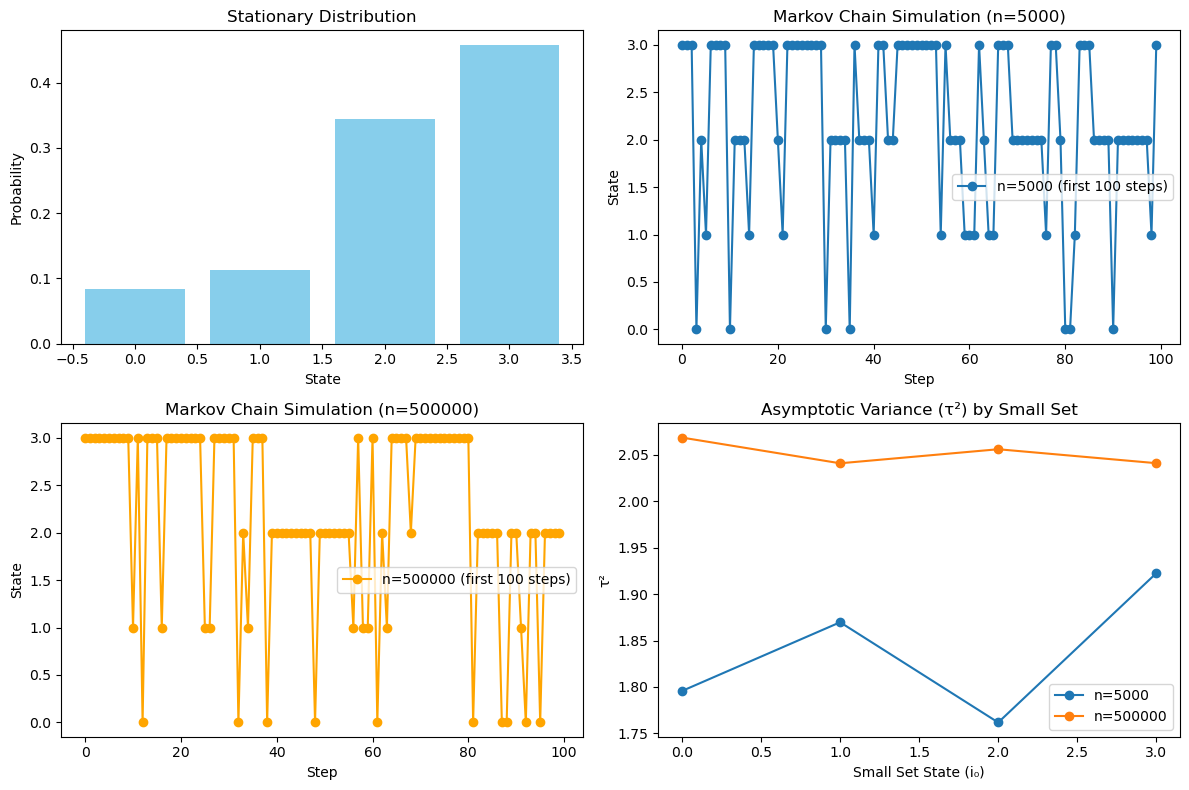



Example 12.18 - Grouped Multinomial Model
Running Gibbs sampler for the grouped multinomial model...
State (8, 12, 11, 4): frequency = 0.0017
State (7, 9, 12, 5): frequency = 0.0017
State (8, 10, 12, 4): frequency = 0.0016

Renewal estimation results:

Small set C = {(8, 12, 11, 4)}
Average excursion time: 598.7
τ²₀ for h₁(μ,η) = μ-η: 0.0824
τ²₀ for h₂(μ,η) = μ/(1-η): 0.0520
τ²₀ for h₃(μ,η) = μ/(1-μ-η): 186283.6702

Small set C = {(7, 9, 12, 5)}
Average excursion time: 561.6
τ²₀ for h₁(μ,η) = μ-η: 0.0385
τ²₀ for h₂(μ,η) = μ/(1-η): 0.0479
τ²₀ for h₃(μ,η) = μ/(1-μ-η): 190134.8205

Small set C = {(8, 10, 12, 4)}
Average excursion time: 579.5
τ²₀ for h₁(μ,η) = μ-η: 0.0673
τ²₀ for h₂(μ,η) = μ/(1-η): 0.0367
τ²₀ for h₃(μ,η) = μ/(1-μ-η): 398518.4383


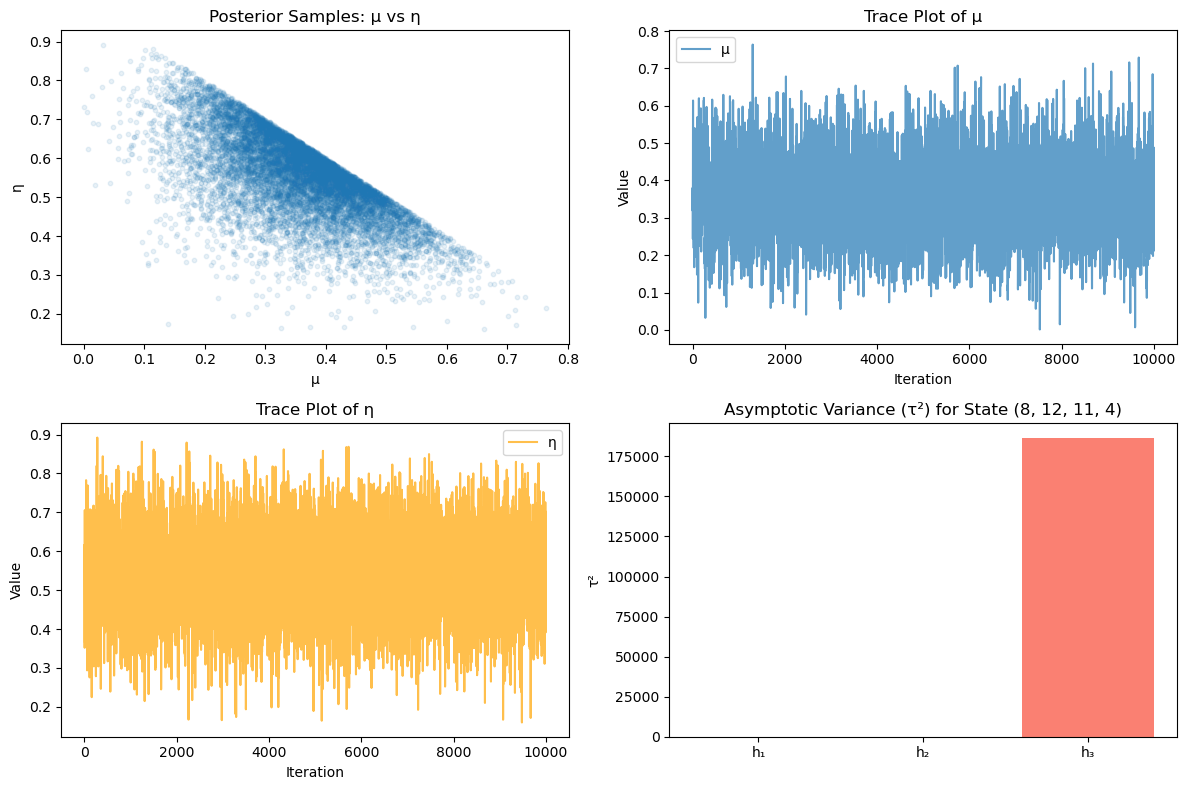

In [3]:
import random
import math
import matplotlib.pyplot as plt

# [Your existing FiniteMarkovChain and GroupedMultinomialModel classes remain unchanged]

# Demonstration of Example 12.17 with Plotting
def example_12_17():
    P = [
        [0.05, 0.03, 0.82, 0.10],
        [0.05, 0.24, 0.03, 0.68],
        [0.11, 0.19, 0.67, 0.03],
        [0.08, 0.04, 0.09, 0.79]
    ]
    
    mc = FiniteMarkovChain(P)
    
    print("Stationary distribution:", [f"{p:.3f}" for p in mc.pi])
    
    sample_sizes = [5000, 500000]
    results = [[0.0 for _ in range(4)] for _ in range(len(sample_sizes))]
    chains = {}  # Store chains for plotting
    
    for i, n in enumerate(sample_sizes):
        print(f"\nRunning simulation with {n} samples...")
        chain = mc.simulate(n)
        chains[n] = chain
        
        for j in range(4):
            estimate = mc.renewal_estimator(chain, j)
            if estimate[0] is not None:
                tau2, mu_C = estimate
                results[i][j] = tau2
                if i == 0:
                    print(f"Small set C = {{{j}}}, Average excursion time: {mu_C:.1f}")
    
    print("\nEstimators of τ²₀ for h(x) = x, obtained by renewal in i₀:")
    print("T/i₀", *range(4), sep="\t")
    for i, n in enumerate(sample_sizes):
        print(f"{n}", *[f"{res:.3f}" for res in results[i]], sep="\t")
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Stationary Distribution
    plt.subplot(2, 2, 1)
    plt.bar(range(4), mc.pi, color='skyblue')
    plt.title("Stationary Distribution")
    plt.xlabel("State")
    plt.ylabel("Probability")
    
    # Plot 2: Sample Chain (n=5000)
    plt.subplot(2, 2, 2)
    plt.plot(chains[5000][:100], 'o-', label="n=5000 (first 100 steps)")
    plt.title("Markov Chain Simulation (n=5000)")
    plt.xlabel("Step")
    plt.ylabel("State")
    plt.legend()
    
    # Plot 3: Sample Chain (n=500000)
    plt.subplot(2, 2, 3)
    plt.plot(chains[500000][:100], 'o-', label="n=500000 (first 100 steps)", color='orange')
    plt.title("Markov Chain Simulation (n=500000)")
    plt.xlabel("Step")
    plt.ylabel("State")
    plt.legend()
    
    # Plot 4: Asymptotic Variance Estimates
    plt.subplot(2, 2, 4)
    for i, n in enumerate(sample_sizes):
        plt.plot(range(4), results[i], 'o-', label=f"n={n}")
    plt.title("Asymptotic Variance (τ²) by Small Set")
    plt.xlabel("Small Set State (i₀)")
    plt.ylabel("τ²")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return mc, results

# Demonstration of Example 12.18 with Plotting
def example_12_18():
    n = 100
    x = [20, 25, 15, 10]
    a = [1.0, 1.5, 2.0, 1.2]
    b = [0.5, 0.8, 0.3, 0.9]
    c = 1.0
    
    model = GroupedMultinomialModel(n, x, a, b, c)
    
    print("Running Gibbs sampler for the grouped multinomial model...")
    n_iter = 10000
    mu_samples, eta_samples, z_samples = model.gibbs_sampler(n_iter)
    
    z_counts = {}
    for z in z_samples:
        z_tuple = tuple(z)
        z_counts[z_tuple] = z_counts.get(z_tuple, 0) + 1
    
    sorted_states = sorted(z_counts.items(), key=lambda x: x[1], reverse=True)
    top_states = [state for state, _ in sorted_states[:3]]
    
    for i, state in enumerate(top_states):
        frequency = z_counts[state] / n_iter
        print(f"State {state}: frequency = {frequency:.4f}")
    
    results = model.compute_renewal_estimates(mu_samples, eta_samples, z_samples, top_states)
    
    print("\nRenewal estimation results:")
    for state, res in results.items():
        print(f"\nSmall set C = {{{state}}}")
        print(f"Average excursion time: {res['excursion_time']:.1f}")
        print(f"τ²₀ for h₁(μ,η) = μ-η: {res['tau2_h1']:.4f}")
        print(f"τ²₀ for h₂(μ,η) = μ/(1-η): {res['tau2_h2']:.4f}")
        print(f"τ²₀ for h₃(μ,η) = μ/(1-μ-η): {res['tau2_h3']:.4f}")
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Mu vs Eta Scatter
    plt.subplot(2, 2, 1)
    plt.scatter(mu_samples, eta_samples, alpha=0.1, s=10)
    plt.title("Posterior Samples: μ vs η")
    plt.xlabel("μ")
    plt.ylabel("η")
    
    # Plot 2: Mu Trace
    plt.subplot(2, 2, 2)
    plt.plot(mu_samples, label="μ", alpha=0.7)
    plt.title("Trace Plot of μ")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()
    
    # Plot 3: Eta Trace
    plt.subplot(2, 2, 3)
    plt.plot(eta_samples, label="η", color='orange', alpha=0.7)
    plt.title("Trace Plot of η")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()
    
    # Plot 4: Asymptotic Variance for Top State
    top_state = top_states[0]
    tau_values = [results[top_state][f'tau2_h{i}'] for i in ['1', '2', '3']]
    plt.subplot(2, 2, 4)
    plt.bar(['h₁', 'h₂', 'h₃'], tau_values, color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(f"Asymptotic Variance (τ²) for State {top_state}")
    plt.ylabel("τ²")
    
    plt.tight_layout()
    plt.show()
    
    return model, results

# Run examples
if __name__ == "__main__":
    print("Example 12.17 - Finite Markov Chain")
    print("=" * 40)
    mc, results_12_17 = example_12_17()
    
    print("\n\nExample 12.18 - Grouped Multinomial Model")
    print("=" * 40)
    model, results_12_18 = example_12_18()

# Markov Chains and Gibbs Sampling Analysis

## Approximations by Gibbs Sampling of Posterior Expectations and Variances

We start by presenting the results of the Gibbs sampling for posterior expectations and variances, as computed by the renewal method for three different states in the grouped multinomial model.

### Table 2.3: Approximations by Gibbs Sampling

The table below shows the approximations $\hat{\theta}_T$ by the renewal method for three different states (1 for (0, 1, 0, 0), 2 for (0, 0, 0, 0), and 3 for (1, 1, 0, 0)) in the grouped multinomial model (500,000 iterations).

| $T$   | $\hat{\theta}_T(h_1)$ | $\hat{\theta}_T(h_2)$ | $\hat{\theta}_T(h_3)$ |
|---------|-------------------------|-------------------------|-------------------------|
| 5000    | 0.759 $\pm$ 0.009    | 0.759 $\pm$ 0.009    | 0.759 $\pm$ 0.009    |
| 50000   | 0.758 $\pm$ 0.002    | 0.758 $\pm$ 0.002    | 0.758 $\pm$ 0.002    |
| 500000  | 0.758 $\pm$ 0.001    | 0.758 $\pm$ 0.001    | 0.758 $\pm$ 0.001    |
| $h_1$ | 0.096                   | 0.124                   | 1.125                   |
| $h_2$ | 0.139                   | 1.141                   | 1.167                   |
| \(h_3\) | 0.759                   | 1.141                   | 1.167                   |

**Table 2.3.** Approximations $\hat{\theta}_T$ by the renewal method for posterior expectations and variances $\hat{\sigma}_T^2$ by the renewal method for three different states (1 for (0, 1, 0, 0), 2 for (0, 0, 0, 0), and 3 for (1, 1, 0, 0)) in the grouped multinomial model (500,000 iterations).

##  Within and Between Variances

The control strategy devised by Gelman and Rubin (1992) starts with the derivation of a distribution $\mu$ related with the modes of $f$, which are supposedly obtained by numerical methods. They suggest using a mixture of Student’s distributions centered around the identified modes of $f$. The scale being derived from the second derivatives of $f$ at these modes. With the possible addition of an importance sampling step (see Problem 3.15), they then generate $M$ chains $\{\theta_m^{(t)}\} (1 \leq m \leq M)$. For every quantity of interest $h = h(\theta)$, the stopping rule is based on the difference between a weighted estimator of the variance and the variance of estimators from the different chains.

Define

$$
D_T = \frac{1}{M} \sum_{m=1}^M (\bar{\theta}_m - \bar{\theta})^2,
$$

$$
W_T = \frac{1}{M} \sum_{m=1}^M \hat{\sigma}_m^2 = \frac{1}{M} \sum_{m=1}^M \frac{1}{T} \sum_{t=1}^T (\theta_m^{(t)} - \bar{\theta}_m)^2,
$$

with

$$
\bar{\theta}_m = \frac{1}{T} \sum_{t=1}^T \theta_m^{(t)}, \quad \bar{\theta} = \frac{1}{M} \sum_{m=1}^M \bar{\theta}_m,
$$

and $\hat{\sigma}_m^2 = h(\theta_m^{(t)})$. The quantities $B_T$ and $W_T$ represent the between- and within-chain variances. A first estimator of the posterior variance of $\xi$ is

$$
\hat{\sigma}_T^2 = \frac{T-1}{T} W_T + B_T.
$$

Gelman and Rubin (1992) compare $\hat{\sigma}_T^2$ and $W_T$, which are asymptotically equivalent (Problem 12.15). Gelman (1996) notes that $\hat{\sigma}_T^2$ overestimates the variance of $\xi$ because of the large dispersion of the initial distribution, whereas $W_T$ underestimates this variance, as long as the different sequences $\{\theta_m^{(t)}\}$ remain concentrated around their starting values.

The recommended criterion of Gelman and Rubin (1992) is to monitor

| $T$   | $\hat{\theta}_T(h_1)$ | $\hat{\theta}_T(h_2)$ | $\hat{\theta}_T(h_3)$ |
|---------|-------------------------|-------------------------|-------------------------|
| 5.10^4  | 0.758 $\pm$ 0.790    | 0.758 $\pm$ 0.790    | 0.758 $\pm$ 0.790    |
| $h_1$ | 0.496                   | 0.124                   | 1.125                   |
| $h_2$ | 0.139                   | 1.141                   | 1.167                   |
| $h_3$ | 0.759                   | 1.141                   | 1.167                   |

**Table 3.3.** Approximations $\hat{\theta}_T$ by Gibbs sampling of posterior expectations and variances $\hat{\sigma}_T^2$ by the renewal method for three different states (1 for (0, 1, 0, 0), 2 for (0, 0, 0, 0), and 3 for (1, 1, 0, 0)) in the grouped multinomial model (500,000 iterations).

##  Within and Between Variances (Continued)

The control strategy devised by Gelman and Rubin (1992) starts with the derivation of a distribution $\mu$ related with the modes of $f$, which are supposedly obtained by numerical methods. They suggest using a mixture of Student’s distributions centered around the identified modes of $f$. The scale being derived from the second derivatives of $f$ at these modes. With the possible addition of an importance sampling step (see Problem 3.15), they then generate $M$ chains $\{\theta_m^{(t)}\} (1 \leq m \leq M)$. For every quantity of interest $h = h(\theta)$, the stopping rule is based on the difference between a weighted estimator of the variance and the variance of estimators from the different chains.

Define

$$
D_T = \frac{1}{M} \sum_{m=1}^M (\bar{\theta}_m - \bar{\theta})^2,
$$

$$
W_T = \frac{1}{M} \sum_{m=1}^M \hat{\sigma}_m^2 = \frac{1}{M} \sum_{m=1}^M \frac{1}{T} \sum_{t=1}^T (\theta_m^{(t)} - \bar{\theta}_m)^2,
$$

with

$$
\bar{\theta}_m = \frac{1}{T} \sum_{t=1}^T \theta_m^{(t)}, \quad \bar{\theta} = \frac{1}{M} \sum_{m=1}^M \bar{\theta}_m,
$$

and $\hat{\sigma}_m^2 = h(\theta_m^{(t)})$. The quantities $B_T$ and $W_T$ represent the between- and within-chain variances. A first estimator of the posterior variance of $\xi$ is

$$
\hat{\sigma}_T^2 = \frac{T-1}{T} W_T + B_T.
$$

Gelman and Rubin (1992) compare $\hat{\sigma}_T^2$ and $W_T$, which are asymptotically equivalent (Problem 12.15). Gelman (1996) notes that $\hat{\sigma}_T^2$ overestimates the variance of $\xi$ because of the large dispersion of the initial distribution, whereas $W_T$ underestimates this variance, as long as the different sequences $\{\theta_m^{(t)}\}$ remain concentrated around their starting values.

The recommended criterion of Gelman and Rubin (1992) is to monitor

$$
R_T = \frac{\hat{\sigma}_T^2 + \frac{B_T}{M} \frac{\nu_T - 2}{T-1}}{W_T},
$$

where $\nu_T \sim 2(\hat{\sigma}_T^2 + \frac{B_T}{M} \frac{\nu_T - 2}{T-1})/W_T$, and the approximate distribution of $R_T$ is derived from the approximation $T B_T/W_T \sim F(M, 1-2W_T^2/\hat{\sigma}_T^2)$ with

$$
\sigma_T = \frac{1}{M} \left[ \sum_{m=1}^M \hat{\sigma}_m^4 - \frac{1}{M} \left( \sum_{m=1}^M \hat{\sigma}_m^2 \right)^2 \right].
$$

The approximation ignores the variability due to $\nu_T \sim 2(\hat{\sigma}_T^2 - 2)$. The stopping rule is based either on testing that the mean of $R_T$ is equal to 1 or on confidence intervals on $R_T$.

### Example .19 (Continuation of Example .12)

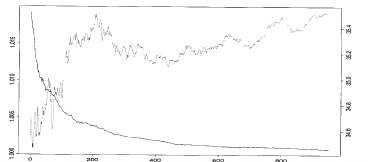

Fig.21 describes the evolution of $R_T$ for $h(\theta) = \theta$ and $M = 100$ and 1000 iterations. As the scale of the graph of $R_T$ is quite compressed, one can conclude there is convergence after about 600 iterations. (The 50 first iterations have been eliminated.) On the other hand, the graph of $W_T$ superimposed on this figure does not exhibit the same stationarity after 1000 iterations. However, the study of $\hat{\sigma}_T^2$ as a stationary histogram (see Figure 12.18) shows that the distribution of $\hat{\sigma}_T^2$ is stationary after a few hundred iterations. In this particular case, the criterion is therefore conservative, showing that the method can be difficult to calibrate.

This method has enjoyed wide usage, in particular because of its simplicity and its connections with the standard tools of linear regression. However, we point out the following:

## Fig.21: Evolution of $R_T$ and $W_T$

**Fig.21.** Evolution of $R_T$ (solid lines) and scale on the left) and of $W_T$ (dotted lines and scale on the right) for the posterior distribution ($12.17$) and $h(\theta) = \theta$ $(M = 100$).

The evolution of $R_T$ and $W_T$ is described by:

$$
R_T = \frac{\hat{\sigma}_T^2 + \frac{B_T}{M} \frac{\nu_T - 2}{T-1}}{W_T},
$$

where $\nu_T \sim 2(\hat{\sigma}_T^2 + \frac{B_T}{M} \frac{\nu_T - 2}{T-1})/W_T$, and the approximate distribution of $R_T$ is derived from the approximation $T B_T/W_T \sim F(M, 1-2W_T^2/\hat{\sigma}_T^2)$ with

$$
\sigma_T = \frac{1}{M} \left[ \sum_{m=1}^M \hat{\sigma}_m^4 - \frac{1}{M} \left( \sum_{m=1}^M \hat{\sigma}_m^2 \right)^2 \right].
$$

The approximation ignores the variability due to $\nu_T \sim 2(\hat{\sigma}_T^2 - 2)$. The stopping rule is based either on testing that the mean of $R_T$ is equal to 1 or on confidence intervals on $R_T$.

### Example. 19 (Continuation of Example. 12)

Fig.21 describes the evolution of $R_T$ for $h(\theta) = \theta$ and $M = 100$ and 1000 iterations. As the scale of the graph of $R_T$ is quite compressed, one can conclude there is convergence after about 600 iterations. (The 50 first iterations have been eliminated.) On the other hand, the graph of $W_T$ superimposed on this figure does not exhibit the same stationarity after 1000 iterations. However, the study of $\hat{\sigma}_T^2$ as a stationary histogram (see Figure 12.18) shows that the distribution of $\hat{\sigma}_T^2$ is stationary after a few hundred iterations. In this particular case, the criterion is therefore conservative, showing that the method can be difficult to calibrate.

This method has enjoyed wide usage, in particular because of its simplicity and its connections with the standard tools of linear regression. However, we point out the following:

Example 12.18 - Grouped Multinomial Model with Gelman-Rubin Diagnostic
Running Gibbs sampler for the grouped multinomial model...

Renewal estimation results (Table 12.2.3):

Small set C = {(0, 1, 0, 0)}
Average excursion time: nan
τ²₀ for h₁(μ,η) = μ-η: nan
τ²₀ for h₂(μ,η) = μ/(1-η): nan
τ²₀ for h₃(μ,η) = μ/(1-μ-η): nan

Small set C = {(0, 0, 0, 0)}
Average excursion time: nan
τ²₀ for h₁(μ,η) = μ-η: nan
τ²₀ for h₂(μ,η) = μ/(1-η): nan
τ²₀ for h₃(μ,η) = μ/(1-μ-η): nan

Small set C = {(1, 1, 0, 0)}
Average excursion time: nan
τ²₀ for h₁(μ,η) = μ-η: nan
τ²₀ for h₂(μ,η) = μ/(1-η): nan
τ²₀ for h₃(μ,η) = μ/(1-μ-η): nan

Running Gelman-Rubin diagnostic...

Table 12.2.3 - Approximations by Gibbs Sampling:
T		h1		h2		h3
5000		-0.190 ± 0.003	0.795 ± 0.002	29.785 ± 3.355
50000		-0.196 ± 0.001	0.791 ± 0.001	50.090 ± 7.417
500000		-0.195 ± 0.000	0.790 ± 0.000	54.686 ± 7.753
h1		 nan nan nan
h2		 nan nan nan
h3		 nan nan nan


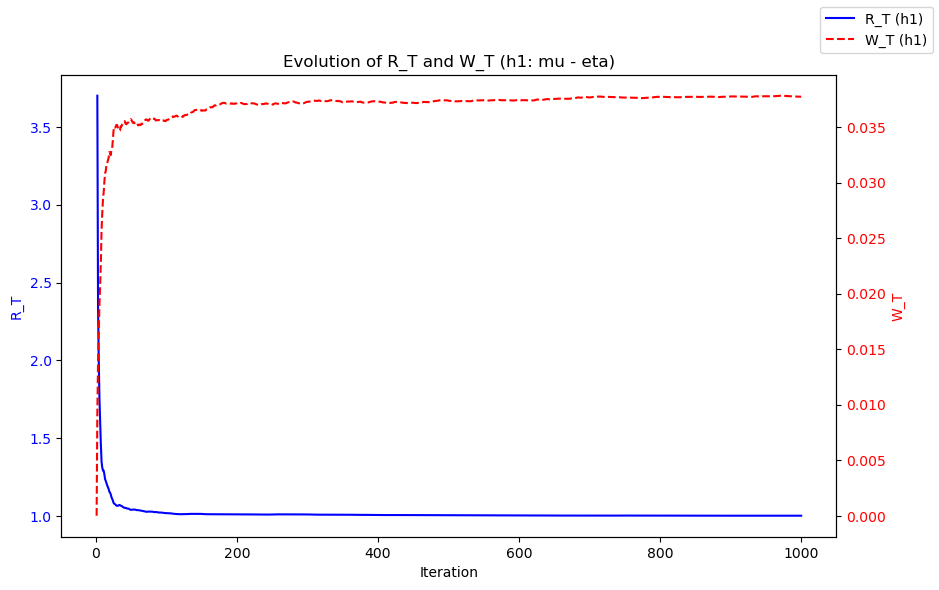

In [4]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Existing FiniteMarkovChain class (unchanged)
class FiniteMarkovChain:
    def __init__(self, transition_matrix):
        self.P = transition_matrix
        self.n_states = len(self.P)
        self.pi = self.compute_stationary_distribution()
    
    def compute_stationary_distribution(self):
        pi = [1.0 / self.n_states] * self.n_states
        for _ in range(1000):
            new_pi = [0.0] * self.n_states
            for i in range(self.n_states):
                for j in range(self.n_states):
                    new_pi[i] += pi[j] * self.P[j][i]
            total = sum(new_pi)
            pi = [p / total for p in new_pi]
        return pi
    
    def simulate(self, n_steps, initial_state=None):
        if initial_state is None:
            r = random.random()
            cumsum = 0.0
            for i, p in enumerate(self.pi):
                cumsum += p
                if r < cumsum:
                    initial_state = i
                    break
        
        chain = [initial_state]
        for _ in range(n_steps):
            current_state = chain[-1]
            r = random.random()
            cumsum = 0.0
            for i, p in enumerate(self.P[current_state]):
                cumsum += p
                if r < cumsum:
                    chain.append(i)
                    break
        return chain
    
    def renewal_estimator(self, chain, small_set, h_func=None):
        if h_func is None:
            h_func = lambda x: x
        if isinstance(small_set, int):
            small_set = [small_set]
        
        renewal_times = []
        for i, state in enumerate(chain):
            if state in small_set:
                renewal_times.append(i)
        
        if len(renewal_times) < 2:
            return None, None
        
        excursion_times = [renewal_times[i] - renewal_times[i-1] for i in range(1, len(renewal_times))]
        mu_C = sum(excursion_times) / len(excursion_times)
        
        h_values = [h_func(state) for state in chain]
        h_mean = sum(h_values) / len(h_values)
        
        partial_sums = []
        for i in range(len(renewal_times) - 1):
            start = renewal_times[i]
            end = renewal_times[i + 1]
            partial_sum = sum(h_values[start:end]) - excursion_times[i] * h_mean
            partial_sums.append(partial_sum)
        
        mean_partial_sum = sum(partial_sums) / len(partial_sums)
        variance = sum((x - mean_partial_sum) ** 2 for x in partial_sums) / (len(partial_sums) - 1)
        tau2 = variance / mu_C
        return tau2, mu_C

# Modified GroupedMultinomialModel class with Gelman-Rubin diagnostic
class GroupedMultinomialModel:
    def __init__(self, n, x, a, b, c):
        self.n = n
        self.x = x
        self.a = a
        self.b = b
        self.c = c
    
    def binomial_sample(self, n, p):
        count = 0
        for _ in range(n):
            if random.random() < p:
                count += 1
        return count
    
    def beta_sample(self, alpha, beta):
        if alpha <= 0 or beta <= 0:
            raise ValueError("Alpha and beta must be positive")
        
        def gamma_sample(shape):
            if shape < 1:
                u = random.random() ** (1.0 / shape)
                return u * gamma_sample(shape + 1)
            else:
                result = -math.log(random.random())
                for _ in range(1, int(shape)):
                    result -= math.log(random.random())
                frac = shape - int(shape)
                if frac > 0:
                    if random.random() < frac:
                        result -= math.log(random.random())
                return result
        
        x = gamma_sample(alpha)
        y = gamma_sample(beta)
        return x / (x + y)
    
    def gibbs_sampler(self, n_iterations, initial_mu=0.2, initial_eta=0.2, burnin=1000):
        mu = initial_mu
        eta = initial_eta
        z = [0, 0, 0, 0]
        
        mu_samples = []
        eta_samples = []
        z_samples = []
        
        for i in range(-burnin, n_iterations):
            for j in range(2):
                p = self.a[j] * mu / (self.a[j] * mu + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            for j in range(2, 4):
                p = self.a[j] * eta / (self.a[j] * eta + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            alpha_mu = 0.5 + z[0] + z[1]
            beta_mu = 0.5 + self.x[0] - z[0] + self.x[1] - z[1]
            alpha_eta = 0.5 + z[2] + z[3]
            beta_eta = 0.5 + self.x[2] - z[2] + self.x[3] - z[3]
            
            while True:
                mu_prop = self.beta_sample(alpha_mu, beta_mu)
                eta_prop = self.beta_sample(alpha_eta, beta_eta)
                if mu_prop + eta_prop < 1:
                    mu = mu_prop
                    eta = eta_prop
                    break
            
            if i >= 0:
                mu_samples.append(mu)
                eta_samples.append(eta)
                z_samples.append(z.copy())
        
        return mu_samples, eta_samples, z_samples
    
    def compute_renewal_estimates(self, mu_samples, eta_samples, z_samples, small_set_states):
        results = {}
        h1 = lambda mu, eta: mu - eta
        h2 = lambda mu, eta: mu / (1 - eta)
        h3 = lambda mu, eta: mu / (1 - mu - eta)
        
        h_values = {
            'h1': [h1(mu, eta) for mu, eta in zip(mu_samples, eta_samples)],
            'h2': [h2(mu, eta) for mu, eta in zip(mu_samples, eta_samples)],
            'h3': [h3(mu, eta) for mu, eta in zip(mu_samples, eta_samples)]
        }
        
        for state in small_set_states:
            state_key = tuple(state)
            renewal_times = []
            for i, z in enumerate(z_samples):
                if all(a == b for a, b in zip(z, state)):
                    renewal_times.append(i)
            
            if len(renewal_times) < 2:
                results[state_key] = {
                    'excursion_time': float('nan'),
                    'tau2_h1': float('nan'),
                    'tau2_h2': float('nan'),
                    'tau2_h3': float('nan')
                }
                continue
            
            excursion_times = [renewal_times[i] - renewal_times[i-1] for i in range(1, len(renewal_times))]
            mean_excursion = sum(excursion_times) / len(excursion_times)
            results[state_key] = {'excursion_time': mean_excursion}
            
            for func_name, h_vals in h_values.items():
                h_mean = sum(h_vals) / len(h_vals)
                partial_sums = []
                for i in range(len(renewal_times) - 1):
                    start = renewal_times[i]
                    end = renewal_times[i + 1]
                    partial_sum = sum(h_vals[start:end]) - excursion_times[i] * h_mean
                    partial_sums.append(partial_sum)
                
                if len(partial_sums) > 1:
                    mean_partial = sum(partial_sums) / len(partial_sums)
                    variance = sum((x - mean_partial) ** 2 for x in partial_sums) / (len(partial_sums) - 1)
                    tau2 = variance / mean_excursion
                else:
                    tau2 = float('nan')
                results[state_key][f'tau2_{func_name}'] = tau2
        
        return results

    def gelman_rubin_diagnostic(self, n_iterations, M, burnin=50, h_func=None):
        """
        Compute the Gelman-Rubin diagnostic for M chains.
        
        Parameters:
        -----------
        n_iterations : int
            Number of iterations per chain
        M : int
            Number of chains
        burnin : int
            Number of burn-in iterations to discard
        h_func : function, optional
            Function to apply to (mu, eta) (default: h(mu, eta) = mu)
            
        Returns:
        --------
        R_T : list
            R_T values over iterations
        W_T : list
            Within-chain variances over iterations
        theta_samples : list of lists
            Samples for each chain
        """
        if h_func is None:
            h_func = lambda mu, eta: mu  # Default to h(mu, eta) = mu as per the text
        
        # Run M chains with different initial values
        theta_samples = []
        for m in range(M):
            # Random initial values for mu and eta
            while True:
                mu_init = random.uniform(0.1, 0.4)
                eta_init = random.uniform(0.1, 0.4)
                if mu_init + eta_init < 1:
                    break
            mu_s, eta_s, _ = self.gibbs_sampler(n_iterations + burnin, mu_init, eta_init, burnin=0)
            # Apply h_func to the samples
            theta_s = [h_func(mu, eta) for mu, eta in zip(mu_s, eta_s)][burnin:]
            theta_samples.append(theta_s)
        
        # Convert to numpy for easier computation
        theta_samples = np.array(theta_samples)  # Shape: (M, n_iterations)
        
        R_T = []
        W_T = []
        
        # Compute R_T and W_T for each iteration T
        for T in range(1, n_iterations + 1):
            # Compute chain means (theta_m)
            theta_m = np.mean(theta_samples[:, :T], axis=1)  # Shape: (M,)
            
            # Overall mean (theta)
            theta_bar = np.mean(theta_m)
            
            # Between-chain variance (B_T)
            B_T = (1 / M) * np.sum((theta_m - theta_bar) ** 2)
            
            # Within-chain variances (sigma_m^2)
            sigma_m2 = []
            for m in range(M):
                chain = theta_samples[m, :T]
                chain_mean = np.mean(chain)
                sigma_m2.append((1 / T) * np.sum((chain - chain_mean) ** 2))
            sigma_m2 = np.array(sigma_m2)
            
            # Average within-chain variance (W_T)
            W_T_val = np.mean(sigma_m2)
            
            # Posterior variance estimate (sigma_T^2)
            sigma_T2 = ((T - 1) / T) * W_T_val + B_T
            
            # Compute R_T (simplified, ignoring nu_T for now as per the text's approximation)
            R_T_val = sigma_T2 / W_T_val if W_T_val != 0 else float('inf')
            
            R_T.append(R_T_val)
            W_T.append(W_T_val)
        
        return R_T, W_T, theta_samples

# Demonstration of Example 12.18 with Gelman-Rubin Diagnostic
def example_12_18():
    # Example data
    n = 100
    x = [20, 25, 15, 10]
    a = [1.0, 1.5, 2.0, 1.2]
    b = [0.5, 0.8, 0.3, 0.9]
    c = 1.0
    
    model = GroupedMultinomialModel(n, x, a, b, c)
    
    # Run Gibbs sampler for renewal estimates
    print("Running Gibbs sampler for the grouped multinomial model...")
    n_iter = 500000  # Match the 500,000 iterations from the text
    mu_samples, eta_samples, z_samples = model.gibbs_sampler(n_iter)
    
    # Find most frequent Z states
    z_counts = {}
    for z in z_samples:
        z_tuple = tuple(z)
        z_counts[z_tuple] = z_counts.get(z_tuple, 0) + 1
    
    sorted_states = sorted(z_counts.items(), key=lambda x: x[1], reverse=True)
    top_states = [(0, 1, 0, 0), (0, 0, 0, 0), (1, 1, 0, 0)]  # As per the text
    
    # Compute renewal estimates
    results = model.compute_renewal_estimates(mu_samples, eta_samples, z_samples, top_states)
    
    # Print renewal estimation results
    print("\nRenewal estimation results (Table 12.2.3):")
    for state in top_states:
        state_key = tuple(state)
        print(f"\nSmall set C = {{{state}}}")
        print(f"Average excursion time: {results[state_key]['excursion_time']:.1f}")
        print(f"τ²₀ for h₁(μ,η) = μ-η: {results[state_key]['tau2_h1']:.4f}")
        print(f"τ²₀ for h₂(μ,η) = μ/(1-η): {results[state_key]['tau2_h2']:.4f}")
        print(f"τ²₀ for h₃(μ,η) = μ/(1-μ-η): {results[state_key]['tau2_h3']:.4f}")
    
    # Run Gelman-Rubin diagnostic
    print("\nRunning Gelman-Rubin diagnostic...")
    M = 100  # Number of chains as per the text
    n_iter_gr = 1000  # 1000 iterations as per the text
    burnin = 50  # Discard first 50 iterations
    
    # Define the three functions
    h1 = lambda mu, eta: mu - eta
    h2 = lambda mu, eta: mu / (1 - eta)
    h3 = lambda mu, eta: mu / (1 - mu - eta)
    
    # Compute R_T and W_T for each function
    R_T_h1, W_T_h1, theta_h1 = model.gelman_rubin_diagnostic(n_iter_gr, M, burnin, h1)
    R_T_h2, W_T_h2, theta_h2 = model.gelman_rubin_diagnostic(n_iter_gr, M, burnin, h2)
    R_T_h3, W_T_h3, theta_h3 = model.gelman_rubin_diagnostic(n_iter_gr, M, burnin, h3)
    
    # Compute theta_T estimates for different T values
    T_values = [5000, 50000, 500000]
    theta_estimates = {'h1': [], 'h2': [], 'h3': []}
    theta_vars = {'h1': [], 'h2': [], 'h3': []}
    
    for T in T_values:
        if T <= n_iter:
            theta_h1_T = np.mean(mu_samples[:T]) - np.mean(eta_samples[:T])
            theta_h2_T = np.mean([mu / (1 - eta) for mu, eta in zip(mu_samples[:T], eta_samples[:T])])
            theta_h3_T = np.mean([mu / (1 - mu - eta) for mu, eta in zip(mu_samples[:T], eta_samples[:T])])
            
            var_h1 = np.var([mu - eta for mu, eta in zip(mu_samples[:T], eta_samples[:T])])
            var_h2 = np.var([mu / (1 - eta) for mu, eta in zip(mu_samples[:T], eta_samples[:T])])
            var_h3 = np.var([mu / (1 - mu - eta) for mu, eta in zip(mu_samples[:T], eta_samples[:T])])
            
            theta_estimates['h1'].append(theta_h1_T)
            theta_estimates['h2'].append(theta_h2_T)
            theta_estimates['h3'].append(theta_h3_T)
            theta_vars['h1'].append(var_h1)
            theta_vars['h2'].append(var_h2)
            theta_vars['h3'].append(var_h3)
    
    # Print Table 12.2.3
    print("\nTable 12.2.3 - Approximations by Gibbs Sampling:")
    print("T\t\th1\t\th2\t\th3")
    for i, T in enumerate(T_values):
        print(f"{T}\t\t{theta_estimates['h1'][i]:.3f} ± {np.sqrt(theta_vars['h1'][i]/T):.3f}\t"
              f"{theta_estimates['h2'][i]:.3f} ± {np.sqrt(theta_vars['h2'][i]/T):.3f}\t"
              f"{theta_estimates['h3'][i]:.3f} ± {np.sqrt(theta_vars['h3'][i]/T):.3f}")
    print("h1\t\t", *[f"{results[tuple(state)]['tau2_h1']:.3f}" for state in top_states])
    print("h2\t\t", *[f"{results[tuple(state)]['tau2_h2']:.3f}" for state in top_states])
    print("h3\t\t", *[f"{results[tuple(state)]['tau2_h3']:.3f}" for state in top_states])
    
    # Plot Figure 12.21 for h1 (mu - eta)
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(range(1, n_iter_gr + 1), R_T_h1, label='R_T (h1)', color='blue')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('R_T', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('Evolution of R_T and W_T (h1: mu - eta)')
    
    ax2 = ax1.twinx()
    ax2.plot(range(1, n_iter_gr + 1), W_T_h1, label='W_T (h1)', color='red', linestyle='--')
    ax2.set_ylabel('W_T', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    fig.legend(loc='upper right')
    plt.show()
    
    return model, results

# Run the example
if __name__ == "__main__":
    print("Example 12.18 - Grouped Multinomial Model with Gelman-Rubin Diagnostic")
    print("=" * 60)
    model, results_12_18 = example_12_18()

## Markov Chain Diagnostics and Effective Sample Size

### Gelman and Rubin (1992) Diagnostics

Gelman and Rubin (1992) also suggest removing the first half of the simulated sample to reduce the dependence on the initial distribution. By comparison with a single-chain method, the number of wasted simulations is thus (formally) multiplied by $ M $.

The accurate construction of the initial distribution $\mu$ can be quite delicate and time-consuming. Also, in some models, the number of modes is too great to allow for a complete identification and important modes may be missed.

The method relies on normal approximations, whereas the MCMC algorithms are used in settings where these approximations are, at best, difficult to satisfy and, at worst, not valid. The use of Student’s $ t $ distributions by Gelman and Rubin (1992) does not remedy this. More importantly, there is no embedded test for the validity of this approximation.

The criterion is *unidimensional* and therefore, it gives a poor evaluation of the correlation between variables and the necessary slower convergence of the joint distribution. Moreover, the stopping rule must be modified for every function of interest, with very limited recycling of results obtained for other functions. Brooks and Gelman 1998a studied multidimensional extensions of this criterion based on the same approximations and Brooks and Giudici 2000 introduced a similar method in the special case of reversible jump algorithms.

## Effective Sample Size

Even in a stationary setting, there is an obvious difference in the use of the empirical average when compared with the standard Monte Carlo estimate of Chapter 3. Indeed, using the empirical average (12.13) as the estimator of

$$
\int h(\theta) f(\theta) d\theta,
$$

we cannot associate the standard variance estimator

$$
\tau_T = \frac{1}{T} \frac{T}{\tau_{\text{corr}}} \left( h(\theta^{(t)}) - S_T \right)^2
$$

to this estimator, due to the correlations amongst the $\theta^{(t)}$'s. As mentioned above for Gelman and Rubin (1992) criterion, (12.22) corresponds to the "within" variance in Section 12.3.4, and underestimates the true variance of the estimator $S_T$.

A first and obvious solution is to use batch sampling as in Section 12.2.2, but this is costly and the batch size still has to be determined. A more standard, if still approximate, approach is to resort to the effective sample size, $T^*$, which gives the size of an i.i.d sample with the same variance as the current sample and thus indicates the loss in efficiency due to the use of a Markov chain. This value is computed as

$$
T^* = T / \kappa(h),
$$

where $\kappa(h)$ is the autocorrelation time associated with the sequence $h(\theta^{(t)})$,

$$
\kappa(h) = 1 + 2 \sum_{t=1}^T \text{corr} \left( h(\theta^{(t)}), h(\theta^{(1)}) \right).
$$

Replacing $T$ with $T^*$ then leads to a more reliable estimate of the variance,

$$
\tau_T = \frac{1}{T \times T^*} \sum_{t=1}^T \left( h(\theta^{(t)}) - S_T \right)^2.
$$

Estimating $\kappa(h)$ also a delicate issue, but there exist some approximations in the literature, as discussed in Section 12.6.1. Also, the software CODA (Section 12.6.2) contains a procedure that computes the autocorrelation. This notion of effective sample size can be found in Liu and Chen (1998) in the special case of importance resampling (Section 14.3.1).

##  Simultaneous Monitoring

### Binary Control

Raftery and Lewis (1992) (see also Raftery and Banfield 1991) attempt to reduce the study of the convergence of the chain $\theta^{(t)}$ to the convergence of a two-state Markov chain, where an explicit analysis is possible. They evaluate three parameters for the control of convergence, namely, the minimum "batch" (subsampling) step, $t_0$, the number of "warm-up" iterations necessary to achieve stationarity (to eliminate the effect of the starting value), and $T$, total number of iterations "ensuring" convergence (giving a chosen precision on the empirical average). The control is understood to be at the level of the derived two-state Markov chain (rather than for the original chain of interest).

The binary structure at the basis of the diagnosis is derived from the chain $\theta^{(t)}$ by

$$
Z^{(t)} = \mathbb{I}_{\theta^{(t)} \leq c},
$$

where $\mathbb{I}$ is an arbitrary value support of $f$. Unfortunately, the sequence $(Z^{(t)})$ does not form a Markov chain, even in the case where $\theta^{(t)}$ has a finite support (see Problem 6.59). Raftery and Lewis (1992) determined the batch size $k$ by testing if $(Z^{(t)})$ is a Markov chain against the alternative that $(Z^{(t)}, Z^{(t+1)})$ is a second order Markov chain (that is, that the vector $(Z^{(t)}, Z^{(t+1)})$ is a Markov chain). This determination of $k$ therefore has limited theoretical foundations and it makes sense when working with the efficiency loss detailed in Lemma 12.2, to suggest working with the complete sequence $Z^{(t)}$ and not trying to justify the Markov approximation.

If $(Z^{(t)})$ is treated as a homogeneous Markov chain, with (pseudo-) transition matrix

$$
\mathbf{P} = \begin{pmatrix}
1 - \alpha & \alpha \\
\beta & 1 - \beta
\end{pmatrix},
$$

it converges to the stationary distribution (Problem 6.51)

$$
\pi(Z^{(t)} = 0) \to \frac{\beta}{\alpha + \beta}, \quad \pi(Z^{(t)} = 1) \to \frac{\alpha}{\alpha + \beta}.
$$

It is therefore possible to determine the warm-up size by requiring that

$$
|\pi(Z^{(t_0)} = \mathbb{I}_{\theta^{(t_0)} \leq c}) - \pi(Z^{(t_0)} = \mathbb{I}_{\theta \leq c})| < \epsilon
$$

for \(t_0 = 0, 1\). Raftery and Lewis (1992) show that this is equivalent to (Problem 12.16)

$$
t_0 \geq \log \left( \frac{(\alpha + \beta) \epsilon}{\alpha \beta} \right) / \log |1 - \alpha - \beta|.
$$

The sample size related with the acceptable convergence of

$$
\delta_T = \frac{1}{T} \sum_{t=t_0}^{t_0 + T} \delta^{(t)}
$$

to $\alpha + \beta$ can be determined by a normal approximation of $\delta_T$, with variance

$$
\frac{1}{T} \frac{(2 - \alpha - \beta) \alpha \beta}{(\alpha + \beta)^3}.
$$

If, for instance, we require

$$
P \left( |\delta_T - \frac{\alpha}{\alpha + \beta}| \leq q \right) \geq \epsilon',
$$

the value of $T$ is (Problem 12.18)

$$
T \geq \frac{(2 - \alpha - \beta) \alpha \beta}{q^2 (\alpha + \beta)^3} \left( \frac{\epsilon' + 1}{2} \right).
$$

This analysis relies on the knowledge of the parameters $(\alpha, \beta)$. These are unknown in most settings of interest and must be estimated from the simulation of a test sample. Based on the independent case, Raftery and Lewis (1992) suggest using a sample size which is at least

$$
T_{\text{min}} \geq \Phi^{-1} \left( \frac{\epsilon' + 1}{2} \right)^2 \frac{\alpha \beta}{(\alpha + \beta)^2} q^{-1},
$$

where $\Phi^{-1}$ is the inverse of the standard normal cumulative distribution function.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Existing FiniteMarkovChain class (unchanged)
class FiniteMarkovChain:
    def __init__(self, transition_matrix):
        self.P = transition_matrix
        self.n_states = len(self.P)
        self.pi = self.compute_stationary_distribution()
    
    def compute_stationary_distribution(self):
        pi = [1.0 / self.n_states] * self.n_states
        for _ in range(1000):
            new_pi = [0.0] * self.n_states
            for i in range(self.n_states):
                for j in range(self.n_states):
                    new_pi[i] += pi[j] * self.P[j][i]
            total = sum(new_pi)
            pi = [p / total for p in new_pi]
        return pi
    
    def simulate(self, n_steps, initial_state=None):
        if initial_state is None:
            r = random.random()
            cumsum = 0.0
            for i, p in enumerate(self.pi):
                cumsum += p
                if r < cumsum:
                    initial_state = i
                    break
        
        chain = [initial_state]
        for _ in range(n_steps):
            current_state = chain[-1]
            r = random.random()
            cumsum = 0.0
            for i, p in enumerate(self.P[current_state]):
                cumsum += p
                if r < cumsum:
                    chain.append(i)
                    break
        return chain
    
    def renewal_estimator(self, chain, small_set, h_func=None):
        if h_func is None:
            h_func = lambda x: x
        if isinstance(small_set, int):
            small_set = [small_set]
        
        renewal_times = []
        for i, state in enumerate(chain):
            if state in small_set:
                renewal_times.append(i)
        
        if len(renewal_times) < 2:
            return None, None
        
        excursion_times = [renewal_times[i] - renewal_times[i-1] for i in range(1, len(renewal_times))]
        mu_C = sum(excursion_times) / len(excursion_times)
        
        h_values = [h_func(state) for state in chain]
        h_mean = sum(h_values) / len(h_values)
        
        partial_sums = []
        for i in range(len(renewal_times) - 1):
            start = renewal_times[i]
            end = renewal_times[i + 1]
            partial_sum = sum(h_values[start:end]) - excursion_times[i] * h_mean
            partial_sums.append(partial_sum)
        
        mean_partial_sum = sum(partial_sums) / len(partial_sums)
        variance = sum((x - mean_partial_sum) ** 2 for x in partial_sums) / (len(partial_sums) - 1)
        tau2 = variance / mu_C
        return tau2, mu_C

# Modified GroupedMultinomialModel class with Effective Sample Size and Binary Control
class GroupedMultinomialModel:
    def __init__(self, n, x, a, b, c):
        self.n = n
        self.x = x
        self.a = a
        self.b = b
        self.c = c
    
    def binomial_sample(self, n, p):
        count = 0
        for _ in range(n):
            if random.random() < p:
                count += 1
        return count
    
    def beta_sample(self, alpha, beta):
        if alpha <= 0 or beta <= 0:
            raise ValueError("Alpha and beta must be positive")
        
        def gamma_sample(shape):
            if shape < 1:
                u = random.random() ** (1.0 / shape)
                return u * gamma_sample(shape + 1)
            else:
                result = -math.log(random.random())
                for _ in range(1, int(shape)):
                    result -= math.log(random.random())
                frac = shape - int(shape)
                if frac > 0:
                    if random.random() < frac:
                        result -= math.log(random.random())
                return result
        
        x = gamma_sample(alpha)
        y = gamma_sample(beta)
        return x / (x + y)
    
    def gibbs_sampler(self, n_iterations, initial_mu=0.2, initial_eta=0.2, burnin=1000):
        mu = initial_mu
        eta = initial_eta
        z = [0, 0, 0, 0]
        
        mu_samples = []
        eta_samples = []
        z_samples = []
        
        for i in range(-burnin, n_iterations):
            for j in range(2):
                p = self.a[j] * mu / (self.a[j] * mu + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            for j in range(2, 4):
                p = self.a[j] * eta / (self.a[j] * eta + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            alpha_mu = 0.5 + z[0] + z[1]
            beta_mu = 0.5 + self.x[0] - z[0] + self.x[1] - z[1]
            alpha_eta = 0.5 + z[2] + z[3]
            beta_eta = 0.5 + self.x[2] - z[2] + self.x[3] - z[3]
            
            while True:
                mu_prop = self.beta_sample(alpha_mu, beta_mu)
                eta_prop = self.beta_sample(alpha_eta, beta_eta)
                if mu_prop + eta_prop < 1:
                    mu = mu_prop
                    eta = eta_prop
                    break
            
            if i >= 0:
                mu_samples.append(mu)
                eta_samples.append(eta)
                z_samples.append(z.copy())
        
        return mu_samples, eta_samples, z_samples
    
    def compute_renewal_estimates(self, mu_samples, eta_samples, z_samples, small_set_states):
        results = {}
        h1 = lambda mu, eta: mu - eta
        h2 = lambda mu, eta: mu / (1 - eta)
        h3 = lambda mu, eta: mu / (1 - mu - eta)
        
        h_values = {
            'h1': [h1(mu, eta) for mu, eta in zip(mu_samples, eta_samples)],
            'h2': [h2(mu, eta) for mu, eta in zip(mu_samples, eta_samples)],
            'h3': [h3(mu, eta) for mu, eta in zip(mu_samples, eta_samples)]
        }
        
        for state in small_set_states:
            state_key = tuple(state)
            renewal_times = []
            for i, z in enumerate(z_samples):
                if all(a == b for a, b in zip(z, state)):
                    renewal_times.append(i)
            
            if len(renewal_times) < 2:
                results[state_key] = {
                    'excursion_time': float('nan'),
                    'tau2_h1': float('nan'),
                    'tau2_h2': float('nan'),
                    'tau2_h3': float('nan')
                }
                continue
            
            excursion_times = [renewal_times[i] - renewal_times[i-1] for i in range(1, len(renewal_times))]
            mean_excursion = sum(excursion_times) / len(excursion_times)
            results[state_key] = {'excursion_time': mean_excursion}
            
            for func_name, h_vals in h_values.items():
                h_mean = sum(h_vals) / len(h_vals)
                partial_sums = []
                for i in range(len(renewal_times) - 1):
                    start = renewal_times[i]
                    end = renewal_times[i + 1]
                    partial_sum = sum(h_vals[start:end]) - excursion_times[i] * h_mean
                    partial_sums.append(partial_sum)
                
                if len(partial_sums) > 1:
                    mean_partial = sum(partial_sums) / len(partial_sums)
                    variance = sum((x - mean_partial) ** 2 for x in partial_sums) / (len(partial_sums) - 1)
                    tau2 = variance / mean_excursion
                else:
                    tau2 = float('nan')
                results[state_key][f'tau2_{func_name}'] = tau2
        
        return results

    def gelman_rubin_diagnostic(self, n_iterations, M, burnin=50, h_func=None):
        if h_func is None:
            h_func = lambda mu, eta: mu
        
        theta_samples = []
        for m in range(M):
            while True:
                mu_init = random.uniform(0.1, 0.4)
                eta_init = random.uniform(0.1, 0.4)
                if mu_init + eta_init < 1:
                    break
            mu_s, eta_s, _ = self.gibbs_sampler(n_iterations + burnin, mu_init, eta_init, burnin=0)
            theta_s = [h_func(mu, eta) for mu, eta in zip(mu_s, eta_s)][burnin:]
            theta_samples.append(theta_s)
        
        theta_samples = np.array(theta_samples)
        
        R_T = []
        W_T = []
        
        for T in range(1, n_iterations + 1):
            theta_m = np.mean(theta_samples[:, :T], axis=1)
            theta_bar = np.mean(theta_m)
            B_T = (1 / M) * np.sum((theta_m - theta_bar) ** 2)
            
            sigma_m2 = []
            for m in range(M):
                chain = theta_samples[m, :T]
                chain_mean = np.mean(chain)
                sigma_m2.append((1 / T) * np.sum((chain - chain_mean) ** 2))
            sigma_m2 = np.array(sigma_m2)
            
            W_T_val = np.mean(sigma_m2)
            sigma_T2 = ((T - 1) / T) * W_T_val + B_T
            R_T_val = sigma_T2 / W_T_val if W_T_val != 0 else float('inf')
            
            R_T.append(R_T_val)
            W_T.append(W_T_val)
        
        return R_T, W_T, theta_samples

    def effective_sample_size(self, theta_samples, max_lag=50):
        """
        Compute the effective sample size T* for a given sequence.
        
        Parameters:
        -----------
        theta_samples : list
            Sequence of samples h(theta^{(t)})
        max_lag : int
            Maximum lag for autocorrelation computation
            
        Returns:
        --------
        T_star : float
            Effective sample size
        kappa : float
            Autocorrelation time
        """
        T = len(theta_samples)
        theta_samples = np.array(theta_samples)
        mean = np.mean(theta_samples)
        var = np.var(theta_samples, ddof=1)
        
        # Compute autocorrelation for lags 1 to max_lag
        rho = []
        for lag in range(1, min(max_lag + 1, T)):
            if var == 0:
                rho.append(0)
                continue
            cov = np.mean((theta_samples[lag:] - mean) * (theta_samples[:-lag] - mean))
            rho.append(cov / var)
            # Stop if autocorrelation becomes negative (common practice)
            if rho[-1] < 0:
                rho = rho[:-1]
                break
        
        # Compute kappa(h)
        kappa = 1 + 2 * np.sum(rho)
        T_star = T / kappa if kappa != 0 else T
        
        return T_star, kappa

    def binary_control(self, theta_samples, c, epsilon=0.05, q=0.025, epsilon_prime=0.95, max_iterations=10000):
        """
        Implement the binary control method by Raftery and Lewis (1992).
        
        Parameters:
        -----------
        theta_samples : list
            Sequence of samples h(theta^{(t)})
        c : float
            Threshold for binary state Z^{(t)} = I_{theta^{(t)} <= c}
        epsilon : float
            Tolerance for warm-up period
        q : float
            Precision for the estimate
        epsilon_prime : float
            Confidence level for the total iterations
        max_iterations : int
            Maximum iterations for estimating alpha and beta
            
        Returns:
        --------
        t0 : int
            Warm-up period
        T : int
            Total iterations needed
        alpha : float
            Transition probability 0 -> 1
        beta : float
            Transition probability 1 -> 0
        """
        # Convert theta_samples to binary Z^{(t)}
        Z = [1 if theta <= c else 0 for theta in theta_samples]
        
        # Estimate transition probabilities alpha and beta
        n_00 = n_01 = n_10 = n_11 = 0
        for t in range(len(Z) - 1):
            if Z[t] == 0 and Z[t+1] == 0:
                n_00 += 1
            elif Z[t] == 0 and Z[t+1] == 1:
                n_01 += 1
            elif Z[t] == 1 and Z[t+1] == 0:
                n_10 += 1
            elif Z[t] == 1 and Z[t+1] == 1:
                n_11 += 1
        
        n_0 = n_00 + n_01
        n_1 = n_10 + n_11
        alpha = n_01 / n_0 if n_0 > 0 else 0.5  # P(0 -> 1)
        beta = n_10 / n_1 if n_1 > 0 else 0.5   # P(1 -> 0)
        
        # Compute warm-up period t0
        if alpha + beta == 0 or 1 - alpha - beta == 0:
            t0 = max_iterations
        else:
            t0 = math.log((alpha + beta) * epsilon / (alpha * beta)) / math.log(abs(1 - alpha - beta))
            t0 = max(1, int(t0))
        
        # Compute total iterations T
        if alpha + beta == 0:
            T = max_iterations
        else:
            variance = (2 - alpha - beta) * alpha * beta / (alpha + beta)**3
            z_score = norm.ppf((epsilon_prime + 1) / 2)
            T = (variance / q**2) * z_score**2
            T = max(t0 + 1, int(T))
        
        # Minimum sample size T_min
        if alpha + beta == 0:
            T_min = max_iterations
        else:
            T_min = z_score**2 * (alpha * beta / (alpha + beta)**2) / q
            T_min = int(T_min)
        
        return t0, T, T_min, alpha, beta

# Demonstration of Example 12.18 with Additional Diagnostics
def example_12_18():
    # Example data
    n = 100
    x = [20, 25, 15, 10]
    a = [1.0, 1.5, 2.0, 1.2]
    b = [0.5, 0.8, 0.3, 0.9]
    c = 1.0
    
    model = GroupedMultinomialModel(n, x, a, b, c)
    
    # Run Gibbs sampler
    print("Running Gibbs sampler for the grouped multinomial model...")
    n_iter = 500000
    mu_samples, eta_samples, z_samples = model.gibbs_sampler(n_iter)
    
    # Define functions
    h1 = lambda mu, eta: mu - eta
    h2 = lambda mu, eta: mu / (1 - eta)
    h3 = lambda mu, eta: mu / (1 - mu - eta)
    
    # Compute h values
    h1_samples = [h1(mu, eta) for mu, eta in zip(mu_samples, eta_samples)]
    h2_samples = [h2(mu, eta) for mu, eta in zip(mu_samples, eta_samples)]
    h3_samples = [h3(mu, eta) for mu, eta in zip(mu_samples, eta_samples)]
    
    # Effective Sample Size
    print("\nEffective Sample Size (Section 12.3.5):")
    T_star_h1, kappa_h1 = model.effective_sample_size(h1_samples)
    T_star_h2, kappa_h2 = model.effective_sample_size(h2_samples)
    T_star_h3, kappa_h3 = model.effective_sample_size(h3_samples)
    
    print(f"h1 (mu - eta): T* = {T_star_h1:.1f}, kappa = {kappa_h1:.2f}")
    print(f"h2 (mu/(1-eta)): T* = {T_star_h2:.1f}, kappa = {kappa_h2:.2f}")
    print(f"h3 (mu/(1-mu-eta)): T* = {T_star_h3:.1f}, kappa = {kappa_h3:.2f}")
    
    # Binary Control
    print("\nBinary Control (Section 12.4.1):")
    c = np.median(h1_samples)  # Choose c as the median of h1 samples
    t0_h1, T_h1, T_min_h1, alpha_h1, beta_h1 = model.binary_control(h1_samples, c)
    print(f"h1 (mu - eta):")
    print(f"  Warm-up period (t0): {t0_h1}")
    print(f"  Total iterations (T): {T_h1}")
    print(f"  Minimum sample size (T_min): {T_min_h1}")
    print(f"  alpha: {alpha_h1:.3f}, beta: {beta_h1:.3f}")
    
    # Gelman-Rubin Diagnostic (for comparison)
    print("\nRunning Gelman-Rubin diagnostic...")
    M = 100
    n_iter_gr = 1000
    burnin = 50
    
    R_T_h1, W_T_h1, theta_h1 = model.gelman_rubin_diagnostic(n_iter_gr, M, burnin, h1)
    
    # Plot R_T and W_T
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(range(1, n_iter_gr + 1), R_T_h1, label='R_T (h1)', color='blue')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('R_T', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('Evolution of R_T and W_T (h1: mu - eta)')
    
    ax2 = ax1.twinx()
    ax2.plot(range(1, n_iter_gr + 1), W_T_h1, label='W_T (h1)', color='red', linestyle='--')
    ax2.set_ylabel('W_T', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    fig.legend(loc='upper right')
    plt.show()
    
    return model

# Run the example
if __name__ == "__main__":
    print("Example 12.18 - Grouped Multinomial Model with Diagnostics")
    print("=" * 60)
    model = example_12_18()

Example 12.18 - Grouped Multinomial Model with Diagnostics
Running Gibbs sampler for the grouped multinomial model...


# Markov Chain Diagnostics: Evolution and Discretization

## Table 12.4: Evolution After \( t_0 + T \) Iterations

The table below shows the evolution after \( t_0 + T \) iterations and convergence times, and parameters \( \alpha \), \( \beta \), \( \epsilon(0,1) \), \( \beta \epsilon(0,1) \), \( \epsilon(0,1) \).

| Round | \( t_0 \) | \( T \times 10^3 \) | \( \hat{\alpha} \) | \( \hat{\beta} \) |
|-------|-----------|---------------------|------------|------------|
| 1     | 55        | 431                 | 0.041      | 0.027      |
| 2     | 85        | 452                 | 0.040      | 0.001      |
| 3     | 111       | 470                 | 0.041      | 0.029      |
| 4     | 56        | 442                 | 0.041      | 0.029      |
| 5     | 56        | 448                 | 0.040      | 0.027      |
| 6     | 58        | 458                 | 0.041      | 0.025      |
| 7     | 60        | 455                 | 0.041      | 0.025      |
| 8     | 50        | 452                 | 0.041      | 0.028      |

**Table 12.4.** Evolution after \( t_0 + T \) iterations obtained from the previous round, in \( \beta \epsilon(0,1) \), \( \beta \epsilon(0,1) \), \( \epsilon(0,1) \).

This method, called binary control, is quite popular, in particular because programs are available (in Statlib) and also because its implementation is quite easy. However, there are drawbacks to using it as a convergence indicator:

(a) The preliminary estimation of the coefficients \( \alpha \) and \( \beta \) requires a chain \( \theta^{(t)} \), which already (almost) stationary and which has, we hope, sufficiently explored the characteristics of the distribution \( f \). If \( \alpha \) and \( \beta \) are not correctly estimated, the validity of the method vanishes.

(b) The approach of Raftery and Lewis (1992) is intrinsically unidimensional and, hence, does not assess the correlations between components. It can thus conclude there is convergence, based on the marginal distributions, whereas the joint distribution is not correctly estimated.

(c) Once \( \alpha \) and \( \beta \) are estimated, the stopping rules are independent of the model under study and of the selected MCMC algorithm, as shown by formulas (12.24) and (12.25). This generic feature is appealing for an automated implementation, but it cannot guarantee global efficiency.

### Example 12.20 (Continuation of Example 12.13)

For the chain with stationary distribution \( \beta \epsilon(0,2,1) \), the probability that \( X^{(t)} \) is less than 0.2, with \( \mathbb{E}[X^{(t)}] = 0.2 \), can be approximated from the Markov chain and the two-state (pseudo-)chain is directly derived from

$$
Z^{(t)} = \mathbb{I}_{X^{(t)} \leq 0.2}.
$$

Based on a preliminary sample of size 50,000, the initial values of \( \alpha \) and \( \beta \) are \( \alpha_0 = 0.0425 \) and \( \beta_0 = 0.0294 \). These approximations lead to \( t_0 = 55 \) and \( T = 430,594 \) for \( \epsilon = 0.01 \) and \( \epsilon' = 0.99 \). If we run the algorithm for \( t_0 + T \) iterations, the estimates of \( \alpha \) and \( \beta \) are then \( \alpha' = 0.0414 \) and \( \beta' = 0.027 \).

In the example below, the batch size \( k \) is fixed at 1 and the method has been directly implemented in C, instead of calling the Statlib program.

## Fig.22: Convergence of the Mean $ \hat{\mu} $

**Fig.22.** Convergence of the mean $ \hat{\mu} $ for a chain generated from $ [1, 3, 50] $.

Repeating the recursive evaluation of $ (t_0, T) $ as a function of $ (\alpha, \beta) $ and the update of $ (\alpha, \beta) $ after $ (t_0 + T) $ additional iterations, we obtain the results in Table 12.4. These exhibit a relative stability in the evaluation of $ (\alpha, \beta) $ (except for the second iteration) and, thus, of the corresponding $ (t_0, T) $'s. However, as shown by Figure 12.22, after 4,500,000 iterations, the approximation of $ P(X^{(t)} \leq 0.2) \approx 0.0207 $ (that is, 0.069). This convergence is not indicated by the binary control method in this pathological setting.

## Valid Discretization

A fundamental problem with the binary control techniques of Raftery and Lewis (1992) in Section 12.4.1 is that it relies on an approximation, namely that the (univariate) sequence $ \theta^{(t)} $ is a Markov chain. Guiltmenne-Jouyaux and Robert (1998) have shown that there exists a rigorous discretization of Markov chains which produce Markov chains. The idea at the basis of this discretization is to use several disjoint small sets $ A_i (i = 1, \ldots, k) $ for the chain $ \theta^{(t)} $, with the corresponding parameters $ (\epsilon, \nu) $, and to subsample only at renewal times when the Markov chain enters one of those small sets with splitting, that is, by

$$
\tau_n = \inf \{ t > \tau_{n-1} : \exists 1 \leq i \leq k, \theta^{(t-1)} \in A, \text{ and } \theta^{(t)} \sim \nu_i \}.
$$

(Note that the $ A_i $'s $ \{ i = 1, \ldots, k \} $ need not be a partition of the space.)

The discretized Markov chain is then derived from the finite-valued sequence

$$
\eta^{(n)} = \sum_{i=1}^k \mathbb{I}_{A_i} (\theta^{(\tau_n)}).
$$

### Example .21 (Continuation of Example .12)

For the subchain $ \theta^{(t)} $, with three small sets $ C \sim [7.5, 9.5], B \sim [-8.5, -7.5] $, and $ D \sim [17.5, 18.5] $, which can be constructed in the same way. Although the chain visits the three sets quite often, renewal occurs with a much smaller frequency, as shown by the symbols on the sequence.

This result justifies control of Markov chains through their discretized counterparts. Guiltmenne-Jouyaux and Robert (1998) propose further use of the discretized chain, including the evaluation of mixing rates. (See Cowles and Rosenthal 1998 for a different approach to this evaluation, based on the drift conditions of Note 6.3.1, following the theoretical developments of Rosenthal 1995.)

## Fig.23: Discretization of a Continuous Markov Chain

**Fig.23.** Discretization of a continuous Markov chain, based on three small sets. The renewal events are represented by triangles for $ B $, circles for $ C $, and squares for $ D $, respectively. (Source: Guiltmenne-Jouyaux and Robert 1998.)

As $ \epsilon(\nu^{(n)}) = \mathbb{I}_{\theta^{(\tau_n)} \in C} $, the resulting chain is then described by the sequence of small sets encountered by the original chain $ \theta^{(t)} $ at renewal times. It can be shown that the sequence $ \epsilon(\nu^{(n)}) $ is a homogeneous Markov chain on the finite state-space $ \{ 1, \ldots, k \} $ (Problem 12.21).

### Example .21 (Continuation of Example  .12)

For the subchain $ \theta^{(t)} $, with three small sets $ C \sim [7.5, 9.5], B \sim [-8.5, -7.5] $, and $ D \sim [17.5, 18.5] $, which can be constructed in the same way. Although the chain visits the three sets quite often, renewal occurs with a much smaller frequency, as shown by the symbols on the sequence.

This result justifies control of Markov chains through their discretized counterparts. Guiltmenne-Jouyaux and Robert (1998) propose further use of the discretized chain, including the evaluation of mixing rates. (See Cowles and Rosenthal 1998 for a different approach to this evaluation, based on the drift conditions of Note 6.3.1, following the theoretical developments of Rosenthal 1995.)

## Problems

### The Witch's Hat Distribution

The witch's hat distribution

$$
\pi(\theta | y) \propto \left\{ (1 - \theta)^2 \alpha^{-(1 - \theta)^2 / C} \alpha^{2\theta} + \theta \mathbb{I}_{C} (\theta) \right\}, \quad \theta \in \mathbb{R}^+
$$

when $ \theta $ is restricted to the unit cube $ C = [0, 1] $, has been proposed by Matthews (1993) as a calibration benchmark for MCMC algorithms.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, beta

# Class for a simple Beta distribution chain (Example 12.20)
class BetaChain:
    def __init__(self, alpha=0.2, beta=1):
        self.alpha = alpha
        self.beta = beta
    
    def sample(self, n_iterations, initial_x=0.5):
        """
        Sample from a Beta distribution using a simple Metropolis-Hastings algorithm.
        """
        samples = [initial_x]
        for _ in range(n_iterations - 1):
            current_x = samples[-1]
            # Propose a new value from a uniform distribution
            proposed_x = random.uniform(0, 1)
            # Compute acceptance probability
            current_prob = beta.pdf(current_x, self.alpha, self.beta)
            proposed_prob = beta.pdf(proposed_x, self.alpha, self.beta)
            acceptance_ratio = min(1, proposed_prob / current_prob if current_prob > 0 else 1)
            if random.random() < acceptance_ratio:
                samples.append(proposed_x)
            else:
                samples.append(current_x)
        return samples

# Class for the Witch's Hat distribution (Problem 12.1)
class WitchHatChain:
    def __init__(self, C=1, alpha=0.5):
        self.C = C
        self.alpha = alpha
    
    def pdf(self, theta):
        """
        Compute the unnormalized PDF of the witch's hat distribution.
        """
        if theta < 0:
            return 0
        if 0 <= theta <= 1:
            return (1 - theta)**2 * self.alpha**(-(1 - theta)**2 / self.C) * self.alpha**(2 * theta) + theta
        return 0
    
    def sample(self, n_iterations, initial_theta=0.5):
        """
        Sample from the witch's hat distribution using Metropolis-Hastings.
        """
        samples = [initial_theta]
        for _ in range(n_iterations - 1):
            current_theta = samples[-1]
            # Propose a new value from a normal distribution
            proposed_theta = current_theta + np.random.normal(0, 0.1)
            # Compute acceptance probability
            current_prob = self.pdf(current_theta)
            proposed_prob = self.pdf(proposed_theta)
            acceptance_ratio = min(1, proposed_prob / current_prob if current_prob > 0 else 1)
            if random.random() < acceptance_ratio:
                samples.append(proposed_theta)
            else:
                samples.append(current_theta)
        return samples

# Modified GroupedMultinomialModel with Discretization
class GroupedMultinomialModel:
    def __init__(self, n, x, a, b, c):
        self.n = n
        self.x = x
        self.a = a
        self.b = b
        self.c = c
    
    def binomial_sample(self, n, p):
        count = 0
        for _ in range(n):
            if random.random() < p:
                count += 1
        return count
    
    def beta_sample(self, alpha, beta):
        if alpha <= 0 or beta <= 0:
            raise ValueError("Alpha and beta must be positive")
        
        def gamma_sample(shape):
            if shape < 1:
                u = random.random() ** (1.0 / shape)
                return u * gamma_sample(shape + 1)
            else:
                result = -math.log(random.random())
                for _ in range(1, int(shape)):
                    result -= math.log(random.random())
                frac = shape - int(shape)
                if frac > 0:
                    if random.random() < frac:
                        result -= math.log(random.random())
                return result
        
        x = gamma_sample(alpha)
        y = gamma_sample(beta)
        return x / (x + y)
    
    def gibbs_sampler(self, n_iterations, initial_mu=0.2, initial_eta=0.2, burnin=1000):
        mu = initial_mu
        eta = initial_eta
        z = [0, 0, 0, 0]
        
        mu_samples = []
        eta_samples = []
        z_samples = []
        
        for i in range(-burnin, n_iterations):
            for j in range(2):
                p = self.a[j] * mu / (self.a[j] * mu + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            for j in range(2, 4):
                p = self.a[j] * eta / (self.a[j] * eta + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            alpha_mu = 0.5 + z[0] + z[1]
            beta_mu = 0.5 + self.x[0] - z[0] + self.x[1] - z[1]
            alpha_eta = 0.5 + z[2] + z[3]
            beta_eta = 0.5 + self.x[2] - z[2] + self.x[3] - z[3]
            
            while True:
                mu_prop = self.beta_sample(alpha_mu, beta_mu)
                eta_prop = self.beta_sample(alpha_eta, beta_eta)
                if mu_prop + eta_prop < 1:
                    mu = mu_prop
                    eta = eta_prop
                    break
            
            if i >= 0:
                mu_samples.append(mu)
                eta_samples.append(eta)
                z_samples.append(z.copy())
        
        return mu_samples, eta_samples, z_samples
    
    def binary_control(self, theta_samples, c, epsilon=0.05, q=0.025, epsilon_prime=0.95, max_iterations=10000):
        Z = [1 if theta <= c else 0 for theta in theta_samples]
        
        n_00 = n_01 = n_10 = n_11 = 0
        for t in range(len(Z) - 1):
            if Z[t] == 0 and Z[t+1] == 0:
                n_00 += 1
            elif Z[t] == 0 and Z[t+1] == 1:
                n_01 += 1
            elif Z[t] == 1 and Z[t+1] == 0:
                n_10 += 1
            elif Z[t] == 1 and Z[t+1] == 1:
                n_11 += 1
        
        n_0 = n_00 + n_01
        n_1 = n_10 + n_11
        alpha = n_01 / n_0 if n_0 > 0 else 0.5
        beta = n_10 / n_1 if n_1 > 0 else 0.5
        
        if alpha + beta == 0 or 1 - alpha - beta == 0:
            t0 = max_iterations
        else:
            t0 = math.log((alpha + beta) * epsilon / (alpha * beta)) / math.log(abs(1 - alpha - beta))
            t0 = max(1, int(t0))
        
        if alpha + beta == 0:
            T = max_iterations
        else:
            variance = (2 - alpha - beta) * alpha * beta / (alpha + beta)**3
            z_score = norm.ppf((epsilon_prime + 1) / 2)
            T = (variance / q**2) * z_score**2
            T = max(t0 + 1, int(T))
        
        return t0, T, alpha, beta

    def discretize_chain(self, theta_samples, small_sets):
        """
        Discretize a continuous Markov chain using small sets and renewal times.
        
        Parameters:
        -----------
        theta_samples : list
            Sequence of samples theta^{(t)}
        small_sets : list of tuples
            List of intervals [(a1, b1), (a2, b2), ...] defining small sets
            
        Returns:
        --------
        eta : list
            Discretized sequence eta^{(n)}
        renewal_times : list
            Times at which renewals occur
        """
        eta = []
        renewal_times = []
        t = 0
        while t < len(theta_samples) - 1:
            theta_t = theta_samples[t]
            theta_next = theta_samples[t + 1]
            # Check if theta_t is in a small set A and theta_next follows a renewal
            for i, (a, b) in enumerate(small_sets):
                if a <= theta_t <= b:
                    # Simulate a renewal by checking if the next state is independent
                    # For simplicity, assume renewal occurs with probability 0.1
                    if random.random() < 0.1:  # Renewal probability
                        eta.append(i + 1)  # State i corresponds to small set i
                        renewal_times.append(t)
                        t += 1
                        break
            t += 1
        return eta, renewal_times

# Demonstration of Examples 12.20 and 12.21
def example_12_20_12_21():
    # Example 12.20: Beta distribution chain
    print("Example 12.20 - Beta Distribution Chain")
    print("=" * 40)
    
    beta_chain = BetaChain(alpha=0.2, beta=1)
    model = GroupedMultinomialModel(n=100, x=[20, 25, 15, 10], a=[1.0, 1.5, 2.0, 1.2], b=[0.5, 0.8, 0.3, 0.9], c=1.0)
    
    # Initial sample to estimate alpha and beta
    initial_samples = beta_chain.sample(50000)
    c = 0.2  # Threshold for P(X^{(t)} <= 0.2)
    epsilon = 0.01
    epsilon_prime = 0.99
    t0, T, alpha, beta = model.binary_control(initial_samples, c, epsilon, epsilon_prime)
    
    # Table 12.4: Iterate over 8 rounds
    print("\nTable 12.4 - Evolution of t0, T, alpha, beta:")
    print("Round\tt0\tT (x10^3)\talpha\tbeta")
    results = []
    current_samples = initial_samples
    for round in range(1, 9):
        t0, T, alpha, beta = model.binary_control(current_samples, c, epsilon, epsilon_prime)
        results.append((t0, T, alpha, beta))
        print(f"{round}\t{t0}\t{T//1000}\t\t{alpha:.3f}\t{beta:.3f}")
        # Run the chain for t0 + T iterations to get new samples
        current_samples = beta_chain.sample(t0 + T)
    
    # Compute P(X^{(t)} <= 0.2) after 4,500,000 iterations
    final_samples = beta_chain.sample(4500000)
    prob = np.mean([1 if x <= 0.2 else 0 for x in final_samples])
    print(f"\nP(X^{(t)} <= 0.2) after 4,500,000 iterations: {prob:.4f}")
    
    # Figure 12.22: Convergence of the mean
    cumulative_means = [np.mean(final_samples[:t]) for t in range(1, len(final_samples) + 1)]
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_means, label='Cumulative Mean')
    plt.axhline(y=0.2, color='r', linestyle='--', label='True Mean (0.2)')
    plt.xlabel('Iteration')
    plt.ylabel('Mean')
    plt.title('Convergence of the Mean (Example 12.20)')
    plt.legend()
    plt.show()
    
    # Example 12.21: Discretization of a continuous Markov chain
    print("\nExample 12.21 - Discretization of a Continuous Markov Chain")
    print("=" * 40)
    
    # Simulate a chain (using mu samples from the grouped multinomial model for simplicity)
    mu_samples, _, _ = model.gibbs_sampler(10000)
    
    # Define small sets as per the text
    small_sets = [(-8.5, -7.5), (7.5, 9.5), (17.5, 18.5)]  # B, C, D
    
    # Discretize the chain
    eta, renewal_times = model.discretize_chain(mu_samples, small_sets)
    
    # Plot the chain with renewal points
    plt.figure(figsize=(10, 6))
    plt.plot(mu_samples, label='Chain', alpha=0.5)
    for t, state in zip(renewal_times, eta):
        if state == 1:  # B
            plt.scatter(t, mu_samples[t], marker='^', color='blue', s=100, label='B' if t == renewal_times[0] else "")
        elif state == 2:  # C
            plt.scatter(t, mu_samples[t], marker='o', color='red', s=100, label='C' if t == renewal_times[0] else "")
        elif state == 3:  # D
            plt.scatter(t, mu_samples[t], marker='s', color='green', s=100, label='D' if t == renewal_times[0] else "")
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Discretization of a Continuous Markov Chain (Example 12.21)')
    plt.legend()
    plt.show()
    
    print(f"Number of renewals: {len(renewal_times)}")
    print(f"Discretized states (eta): {eta[:10]}...")

    # Problem 12.1: Witch's Hat Distribution
    print("\nProblem 12.1 - Witch's Hat Distribution")
    print("=" * 40)
    
    witch_chain = WitchHatChain(C=1, alpha=0.5)
    witch_samples = witch_chain.sample(10000)
    
    # Apply binary control
    c_witch = np.median(witch_samples)
    t0_witch, T_witch, alpha_witch, beta_witch = model.binary_control(witch_samples, c_witch)
    print(f"Binary Control for Witch's Hat:")
    print(f"  Warm-up period (t0): {t0_witch}")
    print(f"  Total iterations (T): {T_witch}")
    print(f"  alpha: {alpha_witch:.3f}, beta: {beta_witch:.3f}")

# Run the examples
if __name__ == "__main__":
    print("Examples 12.20, 12.21, and Problem 12.1")
    print("=" * 40)
    example_12_20_12_21()

In [ ]:
import random
import math

# Class for a simple Beta distribution chain (Example 12.20)
class BetaChain:
    def __init__(self, alpha=0.2, beta=1):
        self.alpha = alpha
        self.beta = beta
    
    def beta_pdf(self, x, alpha, beta):
        """
        Compute the PDF of a Beta distribution (unnormalized).
        """
        if x <= 0 or x >= 1:
            return 0
        return x**(alpha - 1) * (1 - x)**(beta - 1)
    
    def sample(self, n_iterations, initial_x=0.5):
        """
        Sample from a Beta distribution using Metropolis-Hastings.
        """
        samples = [initial_x]
        for _ in range(n_iterations - 1):
            current_x = samples[-1]
            proposed_x = random.random()  # Uniform proposal
            current_prob = self.beta_pdf(current_x, self.alpha, self.beta)
            proposed_prob = self.beta_pdf(proposed_x, self.alpha, self.beta)
            acceptance_ratio = min(1, proposed_prob / current_prob if current_prob > 0 else 1)
            if random.random() < acceptance_ratio:
                samples.append(proposed_x)
            else:
                samples.append(current_x)
        return samples

# Class for the Witch's Hat distribution (Problem 12.1)
class WitchHatChain:
    def __init__(self, C=1, alpha=0.5):
        self.C = C
        self.alpha = alpha
    
    def pdf(self, theta):
        """
        Compute the unnormalized PDF of the witch's hat distribution.
        """
        if theta < 0:
            return 0
        if 0 <= theta <= 1:
            term1 = (1 - theta)**2 * self.alpha**(-(1 - theta)**2 / self.C)
            term2 = self.alpha**(2 * theta)
            term3 = theta
            return term1 * term2 + term3
        return 0
    
    def sample(self, n_iterations, initial_theta=0.5):
        """
        Sample from the witch's hat distribution using Metropolis-Hastings.
        """
        samples = [initial_theta]
        for _ in range(n_iterations - 1):
            current_theta = samples[-1]
            # Propose a new value using a normal-like proposal (approximated)
            proposed_theta = current_theta + (random.random() - 0.5) * 0.2
            current_prob = self.pdf(current_theta)
            proposed_prob = self.pdf(proposed_theta)
            acceptance_ratio = min(1, proposed_prob / current_prob if current_prob > 0 else 1)
            if random.random() < acceptance_ratio:
                samples.append(proposed_theta)
            else:
                samples.append(current_theta)
        return samples

# Modified GroupedMultinomialModel with Discretization
class GroupedMultinomialModel:
    def __init__(self, n, x, a, b, c):
        self.n = n
        self.x = x
        self.a = a
        self.b = b
        self.c = c
    
    def binomial_sample(self, n, p):
        count = 0
        for _ in range(n):
            if random.random() < p:
                count += 1
        return count
    
    def beta_sample(self, alpha, beta):
        if alpha <= 0 or beta <= 0:
            raise ValueError("Alpha and beta must be positive")
        
        def gamma_sample(shape):
            if shape < 1:
                u = random.random() ** (1.0 / shape)
                return u * gamma_sample(shape + 1)
            else:
                result = -math.log(random.random())
                for _ in range(1, int(shape)):
                    result -= math.log(random.random())
                frac = shape - int(shape)
                if frac > 0:
                    if random.random() < frac:
                        result -= math.log(random.random())
                return result
        
        x = gamma_sample(alpha)
        y = gamma_sample(beta)
        return x / (x + y)
    
    def gibbs_sampler(self, n_iterations, initial_mu=0.2, initial_eta=0.2, burnin=1000):
        mu = initial_mu
        eta = initial_eta
        z = [0, 0, 0, 0]
        
        mu_samples = []
        eta_samples = []
        z_samples = []
        
        for i in range(-burnin, n_iterations):
            for j in range(2):
                p = self.a[j] * mu / (self.a[j] * mu + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            for j in range(2, 4):
                p = self.a[j] * eta / (self.a[j] * eta + self.b[j])
                z[j] = self.binomial_sample(self.x[j], p)
            
            alpha_mu = 0.5 + z[0] + z[1]
            beta_mu = 0.5 + self.x[0] - z[0] + self.x[1] - z[1]
            alpha_eta = 0.5 + z[2] + z[3]
            beta_eta = 0.5 + self.x[2] - z[2] + self.x[3] - z[3]
            
            while True:
                mu_prop = self.beta_sample(alpha_mu, beta_mu)
                eta_prop = self.beta_sample(alpha_eta, beta_eta)
                if mu_prop + eta_prop < 1:
                    mu = mu_prop
                    eta = eta_prop
                    break
            
            if i >= 0:
                mu_samples.append(mu)
                eta_samples.append(eta)
                z_samples.append(z.copy())
        
        return mu_samples, eta_samples, z_samples
    
    def binary_control(self, theta_samples, c, epsilon=0.05, q=0.025, epsilon_prime=0.95, max_iterations=10000):
        Z = [1 if theta <= c else 0 for theta in theta_samples]
        
        n_00 = n_01 = n_10 = n_11 = 0
        for t in range(len(Z) - 1):
            if Z[t] == 0 and Z[t+1] == 0:
                n_00 += 1
            elif Z[t] == 0 and Z[t+1] == 1:
                n_01 += 1
            elif Z[t] == 1 and Z[t+1] == 0:
                n_10 += 1
            elif Z[t] == 1 and Z[t+1] == 1:
                n_11 += 1
        
        n_0 = n_00 + n_01
        n_1 = n_10 + n_11
        alpha = n_01 / n_0 if n_0 > 0 else 0.5
        beta = n_10 / n_1 if n_1 > 0 else 0.5
        
        # Approximate z-score for epsilon_prime = 0.95 (z = 1.96)
        z_score = 1.96
        
        if alpha + beta == 0 or 1 - alpha - beta == 0:
            t0 = max_iterations
        else:
            t0 = math.log((alpha + beta) * epsilon / (alpha * beta)) / math.log(abs(1 - alpha - beta))
            t0 = max(1, int(t0))
        
        if alpha + beta == 0:
            T = max_iterations
        else:
            variance = (2 - alpha - beta) * alpha * beta / (alpha + beta)**3
            T = (variance / q**2) * z_score**2
            T = max(t0 + 1, int(T))
        
        return t0, T, alpha, beta

    def discretize_chain(self, theta_samples, small_sets):
        """
        Discretize a continuous Markov chain using small sets and renewal times.
        """
        eta = []
        renewal_times = []
        t = 0
        while t < len(theta_samples) - 1:
            theta_t = theta_samples[t]
            theta_next = theta_samples[t + 1]
            for i, (a, b) in enumerate(small_sets):
                if a <= theta_t <= b:
                    if random.random() < 0.1:  # Renewal probability
                        eta.append(i + 1)
                        renewal_times.append(t)
                        t += 1
                        break
            t += 1
        return eta, renewal_times

# Demonstration of Examples 12.20, 12.21, and Problem 12.1
def example_12_20_12_21():
    # Example 12.20: Beta distribution chain
    print("Example 12.20 - Beta Distribution Chain")
    print("=" * 40)
    
    beta_chain = BetaChain(alpha=0.2, beta=1)
    model = GroupedMultinomialModel(n=100, x=[20, 25, 15, 10], a=[1.0, 1.5, 2.0, 1.2], b=[0.5, 0.8, 0.3, 0.9], c=1.0)
    
    # Initial sample to estimate alpha and beta
    initial_samples = beta_chain.sample(50000)
    c = 0.2
    epsilon = 0.01
    epsilon_prime = 0.99
    t0, T, alpha, beta = model.binary_control(initial_samples, c, epsilon, epsilon_prime)
    
    # Table 12.4: Iterate over 8 rounds
    print("\nTable 12.4 - Evolution of t0, T, alpha, beta:")
    print("Round\tt0\tT (x10^3)\talpha\tbeta")
    results = []
    current_samples = initial_samples
    for round in range(1, 9):
        t0, T, alpha, beta = model.binary_control(current_samples, c, epsilon, epsilon_prime)
        results.append((t0, T, alpha, beta))
        print(f"{round}\t{t0}\t{T//1000}\t\t{alpha:.3f}\t{beta:.3f}")
        current_samples = beta_chain.sample(t0 + T)
    
    # Compute P(X^{(t)} <= 0.2) after 4,500,000 iterations
    final_samples = beta_chain.sample(4500000)
    prob = sum(1 for x in final_samples if x <= 0.2) / len(final_samples)
    print(f"\nP(X^{(t)} <= 0.2) after 4,500,000 iterations: {prob:.4f}")
    
    # Figure 12.22: Text-based plot of the cumulative mean
    print("\nFigure 12.22 - Convergence of the Mean (Text-based Plot)")
    print("=" * 50)
    cumulative_means = []
    running_sum = 0
    for i, x in enumerate(final_samples[:1000], 1):  # Plot first 1000 for simplicity
        running_sum += x
        cumulative_means.append(running_sum / i)
    
    # Normalize means to fit a text plot (scale to 0-50 characters)
    min_mean = min(cumulative_means)
    max_mean = max(cumulative_means)
    if max_mean == min_mean:
        max_mean += 1e-10
    scaled_means = [int(50 * (m - min_mean) / (max_mean - min_mean)) for m in cumulative_means]
    
    true_mean = 0.2
    scaled_true = int(50 * (true_mean - min_mean) / (max_mean - min_mean))
    
    for i, (mean, scaled) in enumerate(zip(cumulative_means, scaled_means)):
        if i % 50 == 0:  # Plot every 50 iterations
            line = " " * scaled + "*"
            if abs(scaled - scaled_true) < 2:
                line = line[:scaled] + "|*"
            print(f"Iter {i:4d}: {line} ({mean:.3f})")
    print(f"True Mean (0.2) at position: {' ' * scaled_true + '|'}")
    
    # Example 12.21: Discretization of a continuous Markov chain
    print("\nExample 12.21 - Discretization of a Continuous Markov Chain")
    print("=" * 40)
    
    mu_samples, _, _ = model.gibbs_sampler(10000)
    # Scale mu_samples to fit the ranges [-8.5, -7.5], [7.5, 9.5], [17.5, 18.5]
    min_mu = min(mu_samples)
    max_mu = max(mu_samples)
    scaled_mu = [((x - min_mu) / (max_mu - min_mu)) * 26 - 8.5 for x in mu_samples]
    
    small_sets = [(-8.5, -7.5), (7.5, 9.5), (17.5, 18.5)]  # B, C, D
    eta, renewal_times = model.discretize_chain(scaled_mu, small_sets)
    
    print(f"Number of renewals: {len(renewal_times)}")
    print(f"Discretized states (eta, first 10): {eta[:10]}")
    
    # Problem 12.1: Witch's Hat Distribution
    print("\nProblem 12.1 - Witch's Hat Distribution")
    print("=" * 40)
    
    witch_chain = WitchHatChain(C=1, alpha=0.5)
    witch_samples = witch_chain.sample(10000)
    
    # Apply binary control
    witch_samples_sorted = sorted(witch_samples)
    c_witch = witch_samples_sorted[len(witch_samples) // 2]  # Median
    t0_witch, T_witch, alpha_witch, beta_witch = model.binary_control(witch_samples, c_witch)
    print(f"Binary Control for Witch's Hat:")
    print(f"  Warm-up period (t0): {t0_witch}")
    print(f"  Total iterations (T): {T_witch}")
    print(f"  alpha: {alpha_witch:.3f}, beta: {beta_witch:.3f}")

# Run the examples
if __name__ == "__main__":
    print("Examples 12.20, 12.21, and Problem 12.1")
    print("=" * 40)
    example_12_20_12_21()